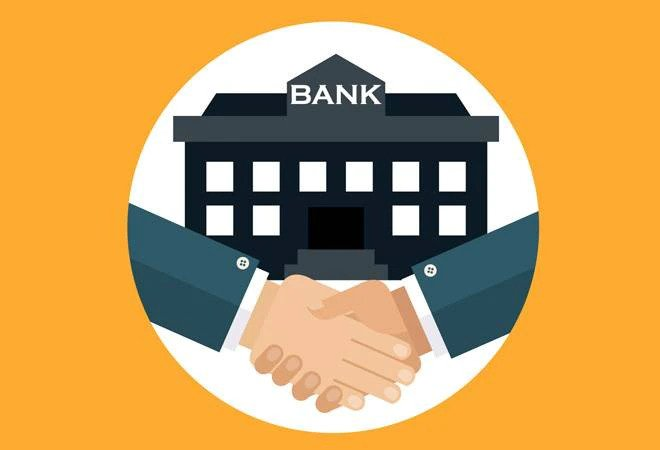

<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            Table of Contents:
            </span>   
        </font>    
</h2>
<span style='font-family:Georgia'>
    <ol>
        <li><a href='#intro'>Introduction</a></li>
        <li><a href='#libraries'>Getting Jupyter Ready</a></li>
        <li><a href='#import'>Reading & Understanding the data</a></li>
        <ol>
            <li><a href='#input'>Importing the input files</a></li>
            <li><a href='#inspect'>Inspect Data Frames</a></li>
        </ol>
        <li><a href='#clean'>Data Cleaning & Manipulation</a></li>
        <ol>
            <li><a href='#null'>Null Value Calculation</a></li>
            <li><a href='#clean1'>Analyze & Delete Unnecessary Columns in applicationDF</a></li>
            <li><a href='#clean2'>Analyze & Delete Unnecessary Columns in previousDF</a></li>
            <li><a href='#stdval'>Standardize Values</a></li>
            <li><a href='#dconv'>Data Type Conversion</a></li>
            <li><a href='#impute'>Null Value Data Imputation</a></li>
            <li><a href='#outlier'>Identifying the outliers</a></li>
        </ol>
        <li><a href='#analysis'>Data Analysis</a></li>
        <ol>
            <li><a href='#imbalance'>Imbalance Analysis</a></li>
            <li><a href='#pltfunc'>Plotting Functions</a></li>
            <li><a href='#catvar'>Categorical Variables Analysis</a></li>
            <li><a href='#numvar'>Numeric Variables Analysis</a></li>
        </ol>
        <li><a href='#merge'>Merged Dataframes Analysis</a></li>
        <li><a href='#conclusion'>Conclusions</a></li>
    </ol>
</span>
    

<a id="intro"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            1. Introduction:
            </span>   
        </font>    
</h2>

<h3 >   
      <font color = purple >
            <span style='font-family:Georgia'>
            Introduction:
            </span>   
        </font>    
</h3>
<p>
    <span style='font-family:Georgia'>
    This case study aims to give an idea of applying EDA in a real business scenario. In this case study, we will develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.
    </span>
</p>   
<hr>
<h3>
    <font color = purple >
        <span style='font-family:Georgia'>
            Business Understanding:
            </span>   
        </font>    
</h3>
<p>
    <span style='font-family:Georgia'>
    The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.<br>
        When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
    </span>
</p>
<ul>
    <span style='font-family:Georgia'>
        <li>If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company</li>
        <li>If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.</li>
    </span>
</ul>
    
<p><span style='font-family:Georgia'>The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:</span></p>
<ul>
    <span style='font-family:Georgia'> 
        <li><b>The client with payment difficulties:</b> he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample</li>
        <li><b>All other cases:</b> All other cases when the payment is paid on time</li>
    </span>
</ul>
    
<p><span style='font-family:Georgia'>When a client applies for a loan, there are four types of decisions that could be taken by the client/company):</span></p>

<ol>
    <span style='font-family:Georgia'>
        <li><b>Approved:</b> The Company has approved loan Application</li>
        <li><b>Cancelled:</b> The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.</li>
        <li><b>Refused:</b> The company had rejected the loan (because the client does not meet their requirements etc.)</li>
        <li><b>Unused offer:</b>  Loan has been cancelled by the client but on different stages of the process.</li>
    </span>
</ol>
<hr>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            Business Objective:
            </span>   
        </font>    
</h3>
<p>
    <span style='font-family:Georgia'>
        This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.<br>
        In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.
    </span>
</p>

<a id="libraries"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            2. Getting Jupyter Ready:
            </span>   
        </font>    
</h2>

<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            2.1 Import Python Libraries:
            </span>   
        </font>    
</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import missingno as mn
import seaborn as sns
import itertools
import plotly.express as px
import chart_studio.plotly as py
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

# setting up plot style 
style.use('seaborn-poster')
style.use('fivethirtyeight')

<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            2.2 Supress Warnings:
            </span>   
        </font>    
</h3>

In [2]:
import warnings
warnings.filterwarnings('ignore')

<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            2.3 Adjust Jupyter Views:
            </span>   
        </font>    
</h3>

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

<a id="import"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            3. Reading & Understanding the data
            </span>   
        </font>    
</h2>

<a id="input"></a>
<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            3.1 Importing the input files
            </span>   
        </font>    
</h3>

In [4]:
applicationDF = pd.read_csv('application_data.csv')
previousDF = pd.read_csv('previous_application.csv')



In [5]:
applicationDF.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
previousDF.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


<a id="inspect"></a>
<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            3.2 Inspect Data Frames
            </span>   
        </font>    
</h3>

In [7]:
# Database dimension
print("Database dimension - applicationDF     :",applicationDF.shape)
print("Database dimension - previousDF        :",previousDF.shape)

#Database size
print("Database size - applicationDF          :",applicationDF.size)
print("Database size - previousDF             :",previousDF.size)

Database dimension - applicationDF     : (307511, 122)
Database dimension - previousDF        : (1670214, 37)
Database size - applicationDF          : 37516342
Database size - previousDF             : 61797918


In [8]:
# Database column types
applicationDF.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [9]:
previousDF.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [10]:
# Checking the numeric variables of the dataframes
applicationDF.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [11]:
previousDF.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


<a id="clean"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            4. Data Cleaning & Manipulation
            </span>   
        </font>    
</h2>

<a id="null"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            4.1 Null Value Calculation
            </span>   
        </font>    
</h3>

<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.1.1 applicationDF Missing values
            </span>   
        </font>    
</h4>

<AxesSubplot:>

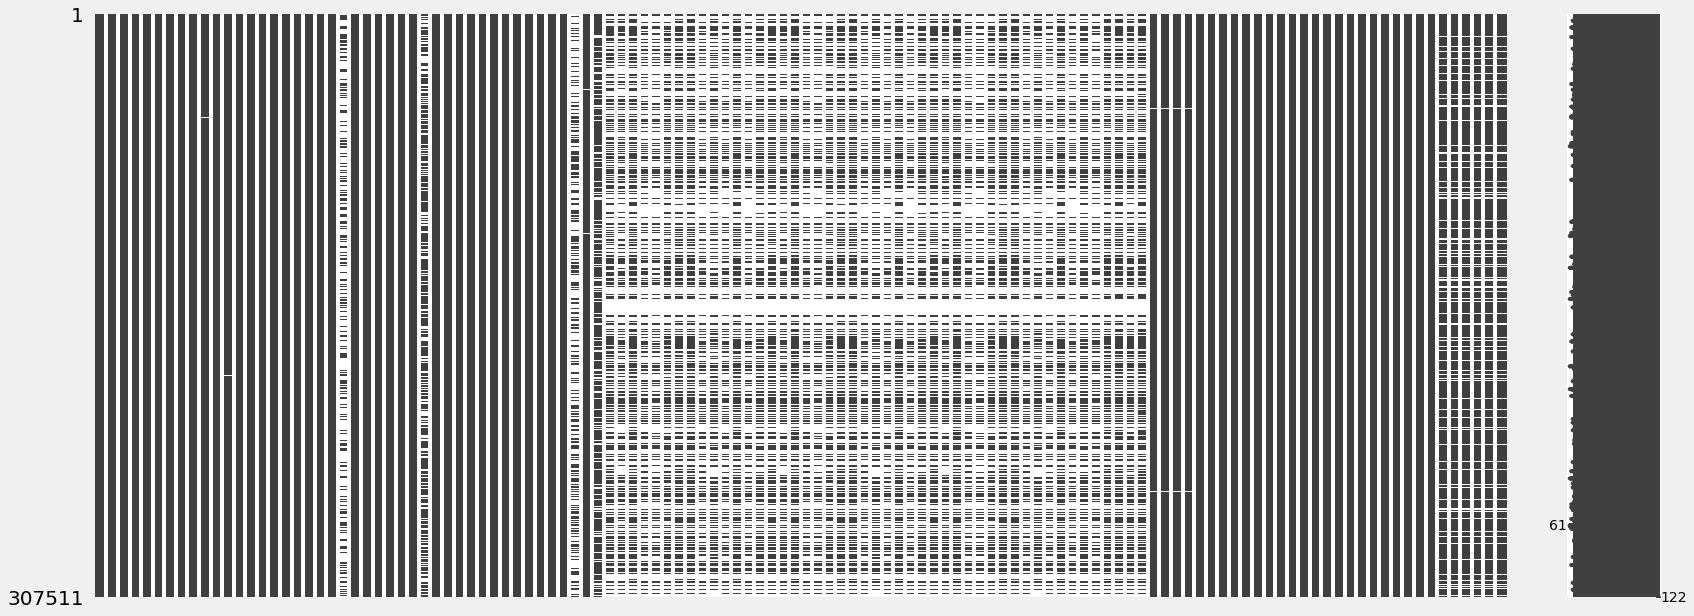

In [12]:
import missingno as mn
mn.matrix(applicationDF)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Based on the above Matrix, it is evidednt that the dataset has many missing values. Let's check for each column what is the % of missing values
    </span>    
</div>

In [13]:
# % null value in each column
round(applicationDF.isnull().sum() / applicationDF.shape[0] * 100.00,2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>There are many columns in applicationDF dataframe where missing value is more than 40%. Let's plot the columns vs missing value % with 40% being the cut-off marks
    </span>    
</div>

In [14]:
null_applicationDF = pd.DataFrame((applicationDF.isnull().sum())*100/applicationDF.shape[0]).reset_index()
null_applicationDF.columns = ['Column Name', 'Null Values Percentage']
fig = px.line(null_applicationDF, x='Column Name', y='Null Values Percentage',markers =True,
              title = 'Percentage of Null values in application_data')
fig.update_layout(
     font_color="black",
    title_font_family="Arial",
    title_font_color="red")     
fig.add_hline(y=40, line_width=3, line_dash="dash", line_color="red")
fig.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>From the plot we can see the columns in which percentage of null values more than 40% are marked above the red line and the columns which have less than 40 % null values below the red line. Let's check the columns which has more than 40% missing values
    </span>    
</div>

In [15]:
# more than or equal to 40% empty rows columns
nullcol_40_application = null_applicationDF[null_applicationDF["Null Values Percentage"]>=40]
nullcol_40_application

,Column Name,Null Values Percentage
21,OWN_CAR_AGE,65.990810
41,EXT_SOURCE_1,56.381073
44,APARTMENTS_AVG,50.749729
45,BASEMENTAREA_AVG,58.515956
46,YEARS_BEGINEXPLUATATION_AVG,48.781019
47,YEARS_BUILD_AVG,66.497784
48,COMMONAREA_AVG,69.872297
49,ELEVATORS_AVG,53.295980
50,ENTRANCES_AVG,50.348768
51,FLOORSMAX_AVG,49.760822


In [16]:
# How many columns have more than or euqal to 40% null values ?
len(nullcol_40_application)

49

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Total of 49 columns are there which have more than 40% null values.Seems like most of the columns with high missing values are related to different area sizes on apartment owned/rented by the loan applicant
    </span>    
</div>

<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.1.2 previousDF Missing Values
            </span>   
        </font>    
</h4>

<AxesSubplot:>

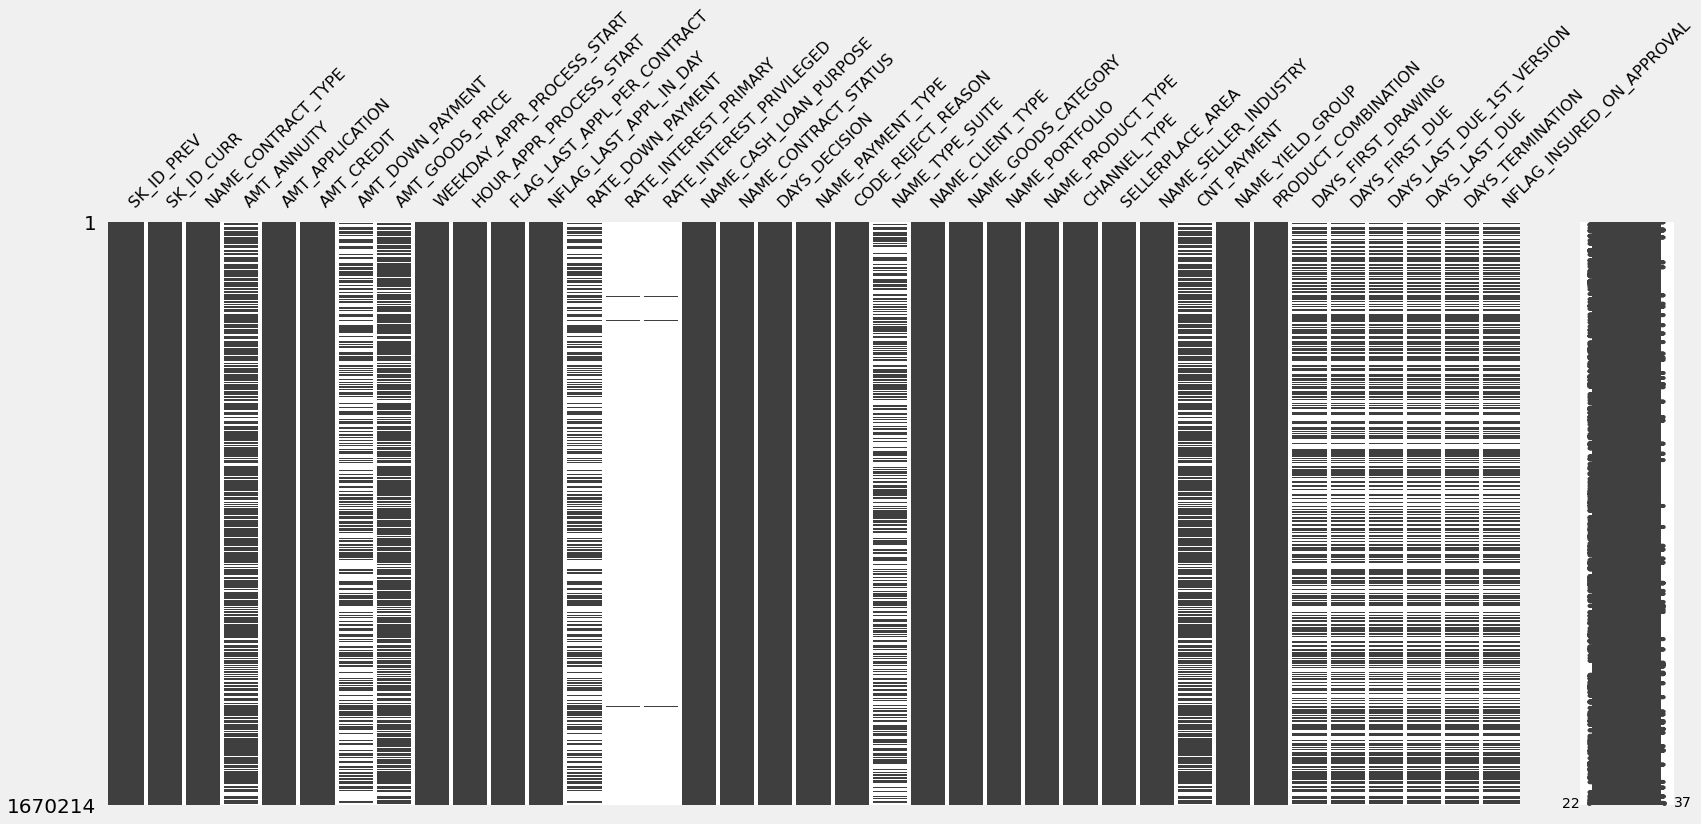

In [17]:
mn.matrix(previousDF)

In [18]:
# checking the null value % of each column in previousDF dataframe
round(previousDF.isnull().sum() / previousDF.shape[0] * 100.00,2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>There are many columns in previousDF dataframe where missing value is more than 40%. Let's plot the columns vs missing value % with 40% being the cut-off marks
    </span>    
</div>

In [19]:
null_previousDF = pd.DataFrame((previousDF.isnull().sum())*100/previousDF.shape[0]).reset_index()
null_previousDF.columns = ['Column Name', 'Null Values Percentage']
fig = px.line(null_previousDF, x='Column Name', y='Null Values Percentage',markers = True, 
              title = 'Percentage of Null values in previous_application')
fig.update_layout(
     font_color="black",
    title_font_family="Arial",
    title_font_color="red")
    
fig.add_hline(y=40, line_width=3, line_dash="dash", line_color="red")
fig.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>From the plot we can see the columns in which percentage of null values more than 40% are marked above the red line and the columns which have less than 40 % null values below the red line. Let's check the columns which has more than 40% missing values
    </span>    
</div>

In [20]:
# more than or equal to 40% empty rows columns
nullcol_40_previous = null_previousDF[null_previousDF["Null Values Percentage"]>=40]
nullcol_40_previous

,Column Name,Null Values Percentage
6,AMT_DOWN_PAYMENT,53.636480
12,RATE_DOWN_PAYMENT,53.636480
13,RATE_INTEREST_PRIMARY,99.643698
14,RATE_INTEREST_PRIVILEGED,99.643698
20,NAME_TYPE_SUITE,49.119754
31,DAYS_FIRST_DRAWING,40.298129
32,DAYS_FIRST_DUE,40.298129
33,DAYS_LAST_DUE_1ST_VERSION,40.298129
34,DAYS_LAST_DUE,40.298129
35,DAYS_TERMINATION,40.298129


In [21]:
# How many columns have more than or euqal to 40% null values ?
len(nullcol_40_previous)

11

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Total of 11 columns are there which have more than 40% null values. These columns can be deleted. Before deleting these columns, let's review if there are more columns which can be dropped or not
    </span>    
</div>

<a id="clean1"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            4.2 Analyze & Delete Unnecessary Columns in applicationDF
            </span>   
        </font>    
</h3>

<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.2.1 EXT_SOURCE_X
            </span>   
        </font>    
</h4>

In [22]:
# Checking correlation of EXT_SOURCE_X columns vs TARGET column
Source = applicationDF[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
source_corr = Source.corr()
fig = px.imshow(source_corr,x=source_corr.columns, y=source_corr.columns,text_auto='.2f',
                title = 'Correlation between EXT_SOURCE_X columns vs TARGET column')
fig.update_layout(
     font_color="black",
    title_font_family="Arial",
    title_font_color="red")
fig.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>Based on the above Heatmap, we can see there is almost no correlation between EXT_SOURCE_X columns and target column, thus we can drop these columns. EXT_SOURCE_1 has 56% null values, where as EXT_SOURCE_3 has close to 20% null values
    </span>    
</div>

In [23]:
# create a list of columns that needs to be dropped including the columns with >40% null values
Unwanted_application = nullcol_40_application["Column Name"].tolist()+ ['EXT_SOURCE_2','EXT_SOURCE_3'] 
# as EXT_SOURCE_1 column is already included in nullcol_40_application 
len(Unwanted_application)

51

<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.2.2 Flag Document
            </span>   
        </font>    
</h4>

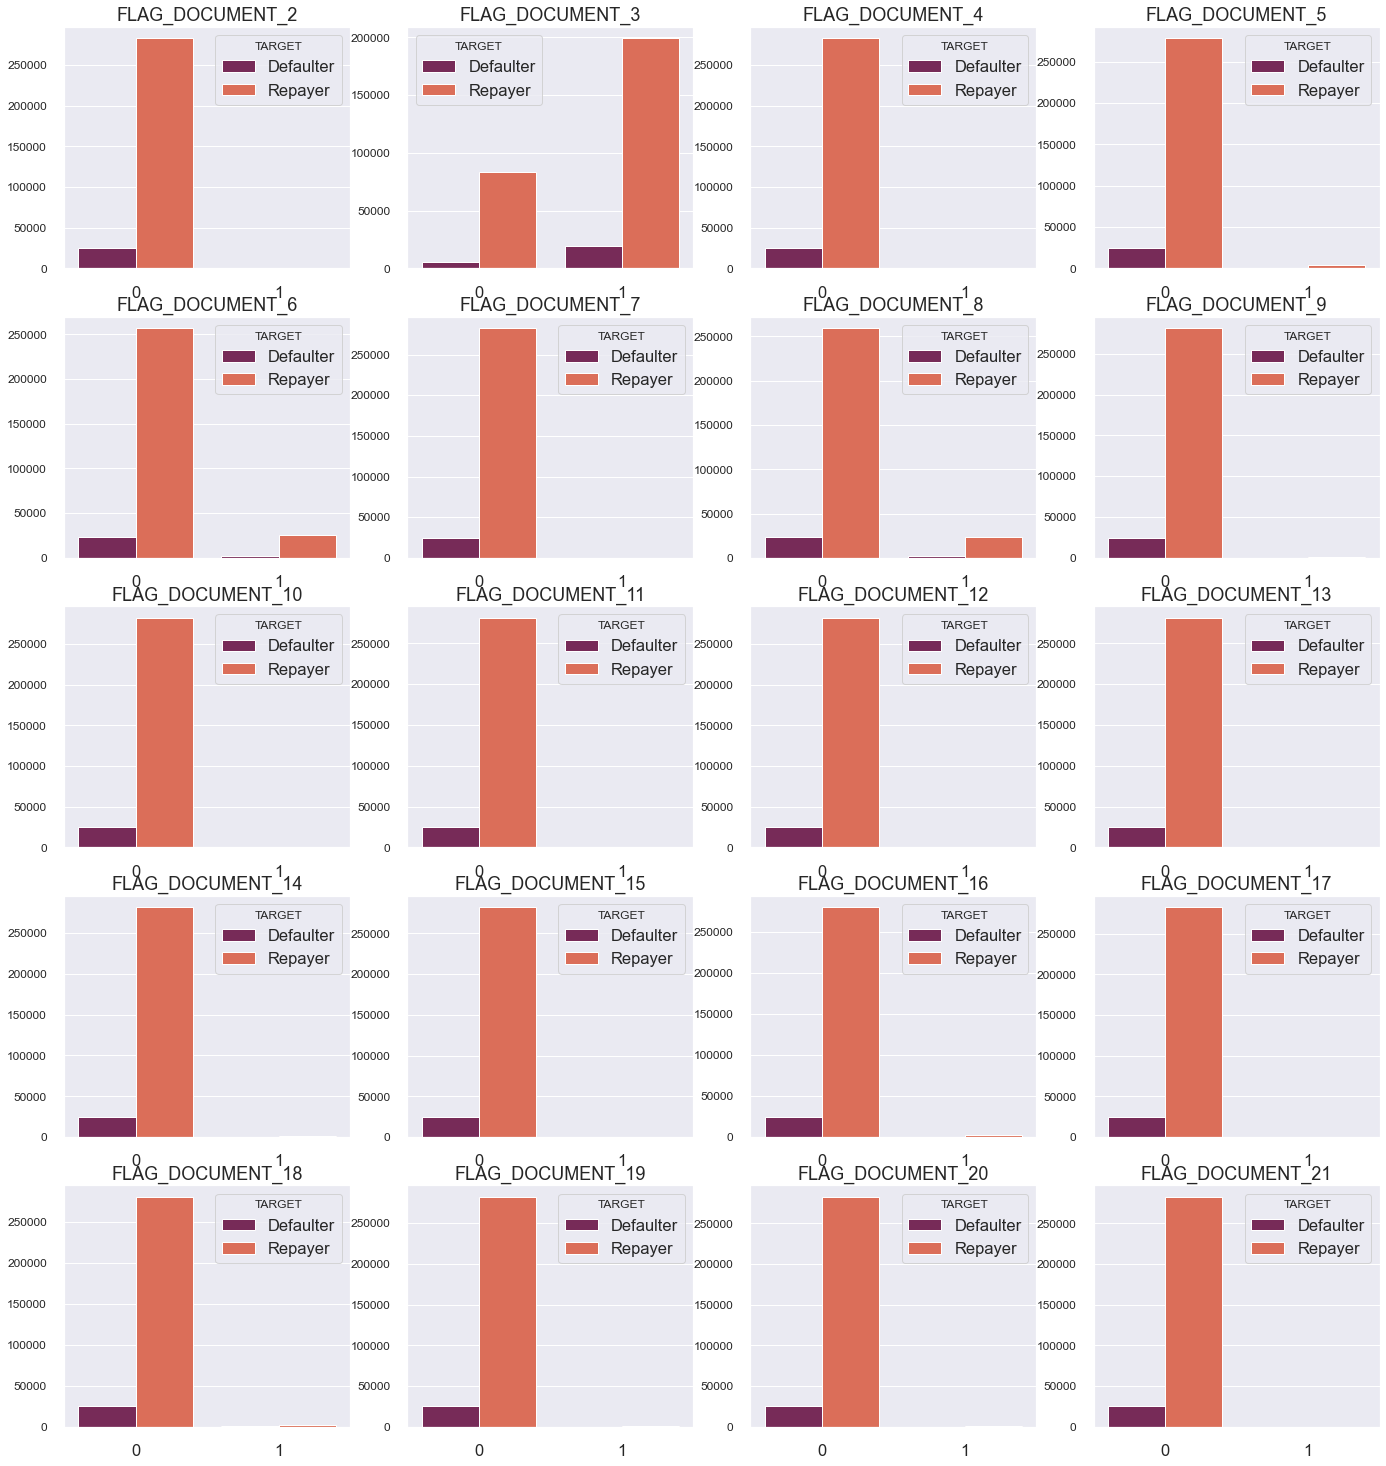

In [24]:
# Checking the relevance of Flag_Document and whether it has any relation with loan repayment status
col_Doc = [ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
sns.set_style("darkgrid")
sns.set(font_scale = 1.5)
df_flag = applicationDF[col_Doc+["TARGET"]]
length = len(col_Doc)
df_flag["TARGET"] = df_flag["TARGET"].replace({1:"Defaulter",0:"Repayer"})
fig = plt.figure(figsize=(21,24))
for i,j in itertools.zip_longest(col_Doc,range(length)):
    plt.subplot(5,4,j+1)
    ax = sns.countplot(df_flag[i],hue=df_flag["TARGET"],palette='rocket')
    plt.yticks(fontsize=12)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>The above graph shows that in most of the loan application cases, clients who applied for loans has not submitted FLAG_DOCUMENT_X except FLAG_DOCUMENT_3. Thus, Except for FLAG_DOCUMENT_3, we can delete rest of the columns. Data shows if borrower has submitted FLAG_DOCUMENT_3 then there is a less chance of defaulting the loan.
    </span>    
</div>

In [25]:
# Including the flag documents for dropping the Document columns
col_Doc.remove('FLAG_DOCUMENT_3') 
Unwanted_application = Unwanted_application + col_Doc
len(Unwanted_application)

70

<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.2.3 Contact Parameters
            </span>   
        </font>    
</h4>

In [26]:
# checking is there is any correlation between mobile phone, work phone etc, email, Family members and Region rating
contact_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
Contact_corr = applicationDF[contact_col].corr()
fig = px.imshow(Contact_corr,x=Contact_corr.columns, y=Contact_corr.columns,text_auto='.5f',aspect = 'auto',color_continuous_scale='RdYlGn')

fig.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>There is no correlation between flags of mobile phone, email etc with loan repayment; thus these columns can be deleted
    </span>    
</div>

In [27]:
# including the 6 FLAG columns to be deleted
contact_col.remove('TARGET') 
Unwanted_application = Unwanted_application + contact_col
len(Unwanted_application)

76

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br> 
        Total 76 columns can be deleted from applicationDF
    </span>    
</div>

In [28]:
# Dropping the unnecessary columns from applicationDF
applicationDF.drop(labels=Unwanted_application,axis=1,inplace=True)

In [29]:
# Inspecting the dataframe after removal of unnecessary columns
applicationDF.shape

(307511, 46)

In [30]:
# inspecting the column types after removal of unnecessary columns
applicationDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>After deleting unnecessary columns, there are 46 columns remaining in applicationDF
    </span>    
</div>

<a id="clean2"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            4.3 Analyze & Delete Unnecessary Columns in previousDF
            </span>   
        </font>    
</h3>

In [31]:
# Getting the 11 columns which has more than 40% unknown
Unwanted_previous = nullcol_40_previous["Column Name"].tolist()
Unwanted_previous

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [32]:
# Listing down columns which are not needed
Unnecessary_previous = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
                        'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

In [33]:
Unwanted_previous = Unwanted_previous + Unnecessary_previous
len(Unwanted_previous)

15

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>
        Total 15 columns can be deleted from previousDF
    </span>    
</div>

In [34]:
# Dropping the unnecessary columns from previous
previousDF.drop(labels=Unwanted_previous,axis=1,inplace=True)
# Inspecting the dataframe after removal of unnecessary columns
previousDF.shape

(1670214, 22)

In [35]:
# inspecting the column types after after removal of unnecessary columns
previousDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br> 
        After deleting unnecessary columns, there are 22 columns remaining in PreviousDF
    </span>    
</div>

<a id="stdval"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
             4.4 Standardize Values
            </span>   
        </font>    
</h3>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy for applicationDF: </b> 
        <ul>
            <li>Convert DAYS_DECISION,DAYS_EMPLOYED, DAYS_REGISTRATION,DAYS_ID_PUBLISH from negative to positive as days cannot be negative.</li>
            <li>Convert DAYS_BIRTH from negative to positive values and calculate age and create categorical bins columns</li>
            <li>Categorize the amount variables into bins</li>
            <li>Convert region rating column and few other columns to categorical</li>
        </ul>       
    </span>    
</div>

In [36]:
# Converting Negative days to positive days

date_col = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

for col in date_col:
    applicationDF[col] = abs(applicationDF[col])

In [37]:
# Binning Numerical Columns to create a categorical column

# Creating bins for income amount
applicationDF['AMT_INCOME_TOTAL']=applicationDF['AMT_INCOME_TOTAL']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

applicationDF['AMT_INCOME_RANGE']=pd.cut(applicationDF['AMT_INCOME_TOTAL'],bins,labels=slot)


In [38]:
applicationDF['AMT_INCOME_RANGE'].value_counts(normalize=True)*100

100K-200K    50.735000
200k-300k    21.210691
0-100K       20.729695
300k-400k     4.776116
400k-500k     1.744669
500k-600k     0.356354
600k-700k     0.282805
800k-900k     0.096980
700k-800k     0.052721
900k-1M       0.009112
1M Above      0.005858
Name: AMT_INCOME_RANGE, dtype: float64

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>More than 50% loan applicants  have income amount in the range of 100K-200K. Almost 92% loan applicants have income less than 300K
    </span>    
</div>

In [39]:
# Creating bins for Credit amount
applicationDF['AMT_CREDIT']=applicationDF['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']

applicationDF['AMT_CREDIT_RANGE']=pd.cut(applicationDF['AMT_CREDIT'],bins=bins,labels=slots)

In [40]:
#checking the binning of data and % of data in each category
applicationDF['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

200k-300k    17.824728
1M Above     16.254703
500k-600k    11.131960
400k-500k    10.418489
100K-200K     9.801275
300k-400k     8.564897
600k-700k     7.820533
800k-900k     7.086576
700k-800k     6.241403
900k-1M       2.902986
0-100K        1.952450
Name: AMT_CREDIT_RANGE, dtype: float64

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>More Than 16% loan applicants have taken loan which amounts to more than 1M.
    </span>    
</div>

In [41]:
# Creating bins for Age
applicationDF['AGE'] = applicationDF['DAYS_BIRTH'] // 365
bins = [0,20,30,40,50,100]
slots = ['0-20','20-30','30-40','40-50','50 above']

applicationDF['AGE_GROUP']=pd.cut(applicationDF['AGE'],bins=bins,labels=slots)

In [42]:
#checking the binning of data and % of data in each category
applicationDF['AGE_GROUP'].value_counts(normalize=True)*100

50 above    31.604398
30-40       27.028952
40-50       24.194582
20-30       17.171743
0-20         0.000325
Name: AGE_GROUP, dtype: float64

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>31% loan applicants have age above 50 years. More than 55% of loan applicants have age over 40 years.
    </span>    
</div>

In [43]:
# Creating bins for Employement Time
applicationDF['YEARS_EMPLOYED'] = applicationDF['DAYS_EMPLOYED'] // 365
bins = [0,5,10,20,30,40,50,60,150]
slots = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']

applicationDF['EMPLOYMENT_YEAR']=pd.cut(applicationDF['YEARS_EMPLOYED'],bins=bins,labels=slots)

In [44]:
#checking the binning of data and % of data in each category
applicationDF['EMPLOYMENT_YEAR'].value_counts(normalize=True)*100

0-5         55.582363
5-10        24.966441
10-20       14.564315
20-30        3.750117
30-40        1.058720
40-50        0.078044
50-60        0.000000
60 above     0.000000
Name: EMPLOYMENT_YEAR, dtype: float64

**<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>More than 55% of the loan applicants have work experience within 0-5 years and almost 80% of them have less than 10 years of work experience
    </span>    
</div>

In [45]:
#Checking the number of unique values each column possess to identify categorical columns
applicationDF.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY             2
TARGET                              2
NAME_CONTRACT_TYPE                  2
REG_REGION_NOT_LIVE_REGION          2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
FLAG_DOCUMENT_3                     2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
REGION_RATING_CLIENT                3
CODE_GENDER                         3
REGION_RATING_CLIENT_W_CITY         3
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_EDUCATION_TYPE                 5
AGE_GROUP                           5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
EMPLOYMENT_YEAR                     6
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
DEF_30_CNT_S

<a id="dconv"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
             4.5 Data Type Conversion
            </span>   
        </font>    
</h3>

In [46]:
# inspecting the column types if they are in correct data type using the above result.
applicationDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>Numeric columns are already in int64 and float64 format. Hence proceeding with other columns.
    </span>    
</div>

In [47]:
#Conversion of Object and Numerical columns to Categorical Columns
categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY'
                      ]
for col in categorical_columns:
    applicationDF[col] =pd.Categorical(applicationDF[col])

In [48]:
# inspecting the column types if the above conversion is reflected
applicationDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
             4.4.2 Standardize Values for previousDF
            </span>   
        </font>    
</h4>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy for previousDF: </b> 
        <ul>
            <li>Convert DAYS_DECISION from negative to positive values and create categorical bins columns.</li>
            <li>Convert loan purpose and few other columns to categorical.</li>
        </ul>
    </span>    
</div>

In [49]:
#Checking the number of unique values each column possess to identify categorical columns
previousDF.nunique().sort_values() 

NAME_PRODUCT_TYPE               3
NAME_PAYMENT_TYPE               4
NAME_CONTRACT_TYPE              4
NAME_CLIENT_TYPE                4
NAME_CONTRACT_STATUS            4
NAME_PORTFOLIO                  5
NAME_YIELD_GROUP                5
CHANNEL_TYPE                    8
CODE_REJECT_REASON              9
NAME_SELLER_INDUSTRY           11
PRODUCT_COMBINATION            17
NAME_CASH_LOAN_PURPOSE         25
NAME_GOODS_CATEGORY            28
CNT_PAYMENT                    49
SELLERPLACE_AREA             2097
DAYS_DECISION                2922
AMT_CREDIT                  86803
AMT_GOODS_PRICE             93885
AMT_APPLICATION             93885
SK_ID_CURR                 338857
AMT_ANNUITY                357959
SK_ID_PREV                1670214
dtype: int64

In [50]:
# inspecting the column types if the above conversion is reflected
previousDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

In [51]:
#Converting negative days to positive days 
previousDF['DAYS_DECISION'] = abs(previousDF['DAYS_DECISION'])

In [52]:
#age group calculation e.g. 388 will be grouped as 300-400
previousDF['DAYS_DECISION_GROUP'] = (previousDF['DAYS_DECISION']-(previousDF['DAYS_DECISION'] % 400)).astype(str)+'-'+ ((previousDF['DAYS_DECISION'] - (previousDF['DAYS_DECISION'] % 400)) + (previousDF['DAYS_DECISION'] % 400) + (400 - (previousDF['DAYS_DECISION'] % 400))).astype(str)


In [53]:
previousDF['DAYS_DECISION_GROUP'].value_counts(normalize=True)*100

0-400        37.490525
400-800      22.944724
800-1200     12.444753
1200-1600     7.904556
2400-2800     6.297456
1600-2000     5.795784
2000-2400     5.684960
2800-3200     1.437241
Name: DAYS_DECISION_GROUP, dtype: float64

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>Almost 37% loan applicatants have applied for a new loan within 0-400 days of previous loan decision
    </span>    
</div>

In [54]:
#Converting Categorical columns from Object to categorical 
Catgorical_col_p = ['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE','DAYS_DECISION_GROUP']

for col in Catgorical_col_p:
    previousDF[col] =pd.Categorical(previousDF[col])

In [55]:
# inspecting the column types after conversion
previousDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   SK_ID_PREV              1670214 non-null  int64   
 1   SK_ID_CURR              1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE      1670214 non-null  category
 3   AMT_ANNUITY             1297979 non-null  float64 
 4   AMT_APPLICATION         1670214 non-null  float64 
 5   AMT_CREDIT              1670213 non-null  float64 
 6   AMT_GOODS_PRICE         1284699 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  category
 8   NAME_CONTRACT_STATUS    1670214 non-null  category
 9   DAYS_DECISION           1670214 non-null  int64   
 10  NAME_PAYMENT_TYPE       1670214 non-null  category
 11  CODE_REJECT_REASON      1670214 non-null  category
 12  NAME_CLIENT_TYPE        1670214 non-null  category
 13  NAME_GOODS_CATEGORY     1670214 non-null  

<a id="impute"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
             4.6 Null Value Data Imputation
            </span>   
        </font>    
</h3>

<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
             4.6.1 Imputing Null Values in applicationDF
            </span>   
        </font>    
</h4>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy for applicationDF: </b> 
        <ul>
            <li>To impute null values in categorical variables which has lower null percentage, mode() is used to impute the most frequent items.</li>
            <li>To impute null values in categorical variables which has higher null percentage, a new category is created.</li>
            <li>To impute null values in numerical variables which has lower null percentage, median() is used as </li>
            <ul>
                <li>There are no outliers in the columns</li>
                <li>Mean returned decimal values and median returned whole numbers and the columns were number of requests</li>
            </ul>        
        </ul>
    </span>    
</div>

In [56]:
# checking the null value % of each column in applicationDF dataframe
round(applicationDF.isnull().sum() / applicationDF.shape[0] * 100.00,2)


SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OCCUPATION_TYPE                31.35
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
R

<p>
    <span style='font-family:Georgia'>
           Impute categorical variable 'NAME_TYPE_SUITE' which has lower null percentage(0.42%) with the most frequent category using mode()[0]:
    </span>
</p>

    

In [57]:
applicationDF['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [58]:
applicationDF['NAME_TYPE_SUITE'].fillna((applicationDF['NAME_TYPE_SUITE'].mode()[0]),inplace = True)

<p>
    <span style='font-family:Georgia'>
           Impute categorical variable 'OCCUPATION_TYPE' which has higher null percentage(31.35%) with a new category as assigning to any existing category might influence the analysis:
    </span>
</p>

    

In [59]:

applicationDF['OCCUPATION_TYPE'] = applicationDF['OCCUPATION_TYPE'].cat.add_categories('Unknown')
applicationDF['OCCUPATION_TYPE'].fillna('Unknown', inplace =True) 

<p>
    <span style='font-family:Georgia'>
           Impute numerical variables with the median as there are no outliers that can be seen from results of describe() and mean() returns decimal values and these columns represent number of enquiries made which cannot be decimal:
    </span>
</p>
    

In [60]:
applicationDF[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


<p>
    <span style='font-family:Georgia'>
           Impute with median as mean has decimals and this is number of requests
    </span>
</p>

In [61]:
amount = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
         'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

for col in amount:
    applicationDF[col].fillna(applicationDF[col].median(),inplace = True)

In [62]:
# checking the null value % of each column in previousDF dataframe
round(applicationDF.isnull().sum() / previousDF.shape[0] * 100.00,2)

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.02
NAME_TYPE_SUITE                0.00
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
OCCUPATION_TYPE                0.00
CNT_FAM_MEMBERS                0.00
REGION_RATING_CLIENT           0.00
REGION_RATING_CLIENT_W_CITY    0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
REG_REGION_NOT_LIVE_REGION  

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br> We still have few null values in the columns: AMT_GOODS_PRICE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE. We can ignore as this percentage is very less.
    </span>    
</div>

> <h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
             4.6.2 Imputing Null Values in previousDF
            </span>   
        </font>    
</h4>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy for PreviousDF: </b> 
        <ul>
            <li>To impute null values in numerical column, we analysed the loan status and assigned values.</li>
            <li>To impute null values in continuous variables, we plotted the distribution of the columns and used </li>
            <ul>
                <li>median if the distribution is skewed</li>
                <li>mode if the distribution pattern is preserved.</li>
            </ul>        
        </ul>
    </span>    
</div>

In [63]:
# checking the null value % of each column in previousDF dataframe
round(previousDF.isnull().sum() / previousDF.shape[0] * 100.00,2)

SK_ID_PREV                 0.00
SK_ID_CURR                 0.00
NAME_CONTRACT_TYPE         0.00
AMT_ANNUITY               22.29
AMT_APPLICATION            0.00
AMT_CREDIT                 0.00
AMT_GOODS_PRICE           23.08
NAME_CASH_LOAN_PURPOSE     0.00
NAME_CONTRACT_STATUS       0.00
DAYS_DECISION              0.00
NAME_PAYMENT_TYPE          0.00
CODE_REJECT_REASON         0.00
NAME_CLIENT_TYPE           0.00
NAME_GOODS_CATEGORY        0.00
NAME_PORTFOLIO             0.00
NAME_PRODUCT_TYPE          0.00
CHANNEL_TYPE               0.00
SELLERPLACE_AREA           0.00
NAME_SELLER_INDUSTRY       0.00
CNT_PAYMENT               22.29
NAME_YIELD_GROUP           0.00
PRODUCT_COMBINATION        0.02
DAYS_DECISION_GROUP        0.00
dtype: float64

<p>
    <span style='font-family:Georgia'>
           Impute AMT_ANNUITY with median as the distribution is greatly skewed:
    </span>
</p>

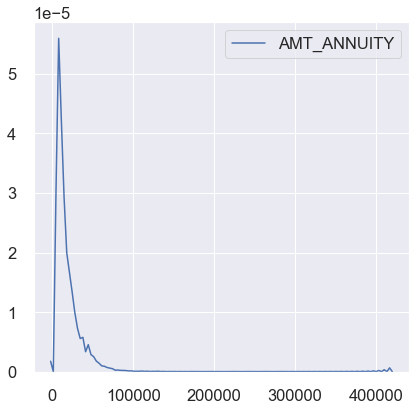

In [64]:
plt.figure(figsize=(6,6))
sns.kdeplot(previousDF['AMT_ANNUITY'])
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>There is a single peak at the left side of the distribution and it indicates the presence of outliers and hence imputing with mean would not be the right approach and hence imputing with median.
    </span>    
</div>

In [65]:
previousDF['AMT_ANNUITY'].fillna(previousDF['AMT_ANNUITY'].median(),inplace = True)

<p>
    <span style='font-family:Georgia'>
           Impute AMT_GOODS_PRICE with mode as the distribution is closely similar:
    </span>
</p>

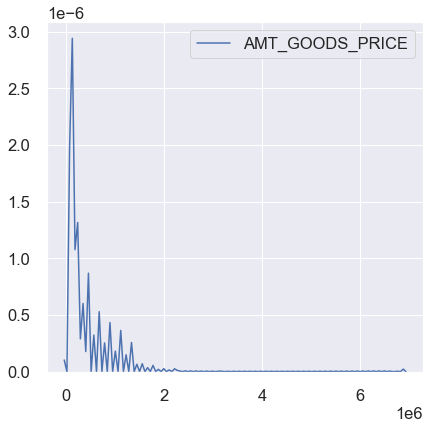

In [66]:
plt.figure(figsize=(6,6))
sns.kdeplot(previousDF['AMT_GOODS_PRICE'][pd.notnull(previousDF['AMT_GOODS_PRICE'])])
plt.show()

<p>
    <span style='font-family:Georgia'>
           There are several peaks along the distribution. Let's impute using the mode, mean and median and see if the distribution is still about the same.
    </span>
</p>

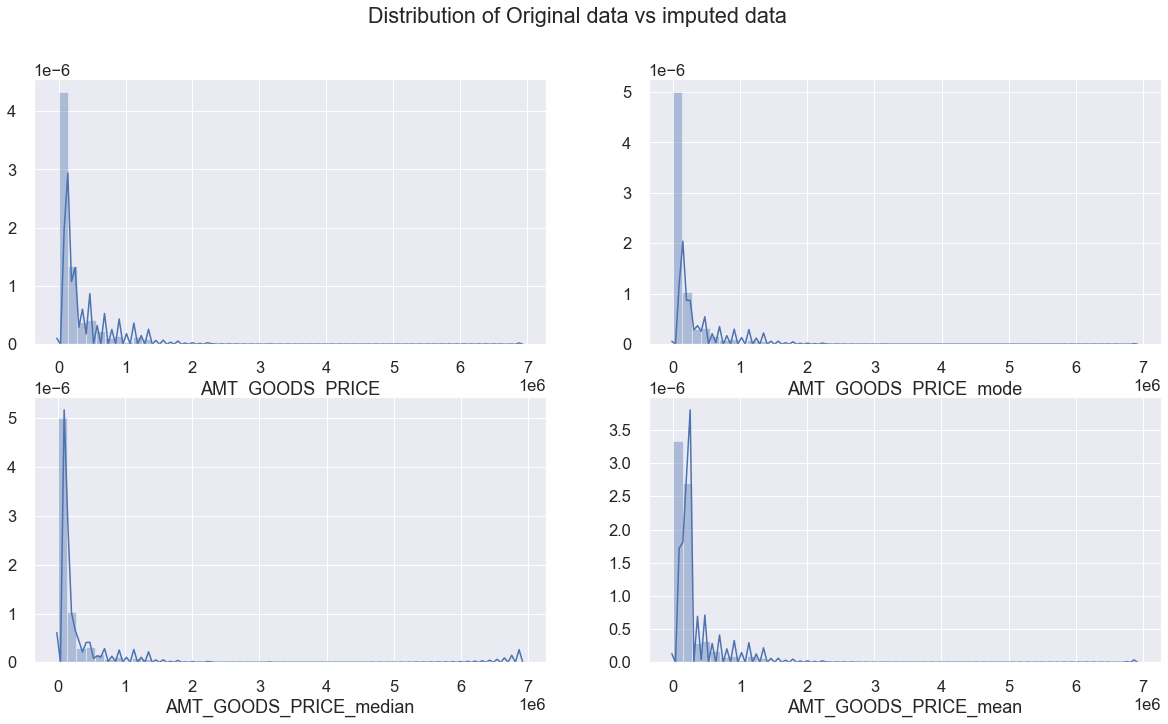

In [67]:
statsDF = pd.DataFrame() # new dataframe with columns imputed with mode, median and mean
statsDF['AMT_GOODS_PRICE_mode'] = previousDF['AMT_GOODS_PRICE'].fillna(previousDF['AMT_GOODS_PRICE'].mode()[0])
statsDF['AMT_GOODS_PRICE_median'] = previousDF['AMT_GOODS_PRICE'].fillna(previousDF['AMT_GOODS_PRICE'].median())
statsDF['AMT_GOODS_PRICE_mean'] = previousDF['AMT_GOODS_PRICE'].fillna(previousDF['AMT_GOODS_PRICE'].mean())

cols = ['AMT_GOODS_PRICE_mode', 'AMT_GOODS_PRICE_median','AMT_GOODS_PRICE_mean']

plt.figure(figsize=(18,10))
plt.suptitle('Distribution of Original data vs imputed data')
plt.subplot(221)
sns.distplot(previousDF['AMT_GOODS_PRICE'][pd.notnull(previousDF['AMT_GOODS_PRICE'])]);
for i in enumerate(cols): 
    plt.subplot(2,2,i[0]+2)
    sns.distplot(statsDF[i[1]])

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>The original distribution is closer with the distribution of data imputed with mode in this case
    </span>    
</div>

In [68]:
previousDF['AMT_GOODS_PRICE'].fillna(previousDF['AMT_GOODS_PRICE'].mode()[0], inplace=True)

<p>
    <span style='font-family:Georgia'>
           Impute CNT_PAYMENT with 0 as the NAME_CONTRACT_STATUS for these indicate that most of these loans were not started:
    </span>
</p>

In [69]:
previousDF.loc[previousDF['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

In [70]:
previousDF['CNT_PAYMENT'].fillna(0,inplace = True)

In [71]:
# checking the null value % of each column in previousDF dataframe
round(previousDF.isnull().sum() / previousDF.shape[0] * 100.00,2)

SK_ID_PREV                0.00
SK_ID_CURR                0.00
NAME_CONTRACT_TYPE        0.00
AMT_ANNUITY               0.00
AMT_APPLICATION           0.00
AMT_CREDIT                0.00
AMT_GOODS_PRICE           0.00
NAME_CASH_LOAN_PURPOSE    0.00
NAME_CONTRACT_STATUS      0.00
DAYS_DECISION             0.00
NAME_PAYMENT_TYPE         0.00
CODE_REJECT_REASON        0.00
NAME_CLIENT_TYPE          0.00
NAME_GOODS_CATEGORY       0.00
NAME_PORTFOLIO            0.00
NAME_PRODUCT_TYPE         0.00
CHANNEL_TYPE              0.00
SELLERPLACE_AREA          0.00
NAME_SELLER_INDUSTRY      0.00
CNT_PAYMENT               0.00
NAME_YIELD_GROUP          0.00
PRODUCT_COMBINATION       0.02
DAYS_DECISION_GROUP       0.00
dtype: float64

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>We still have few null values in the PRODUCT_COMBINATION column. We can ignore as this percentage is very less.
    </span>    
</div>

<a id="outlier"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
             4.7 Identifying the outliers
            </span>   
        </font>    
</h3>

<p>
    <span style='font-family:Georgia'>
           Finding outlier information in applicationDF
    </span>
</p>

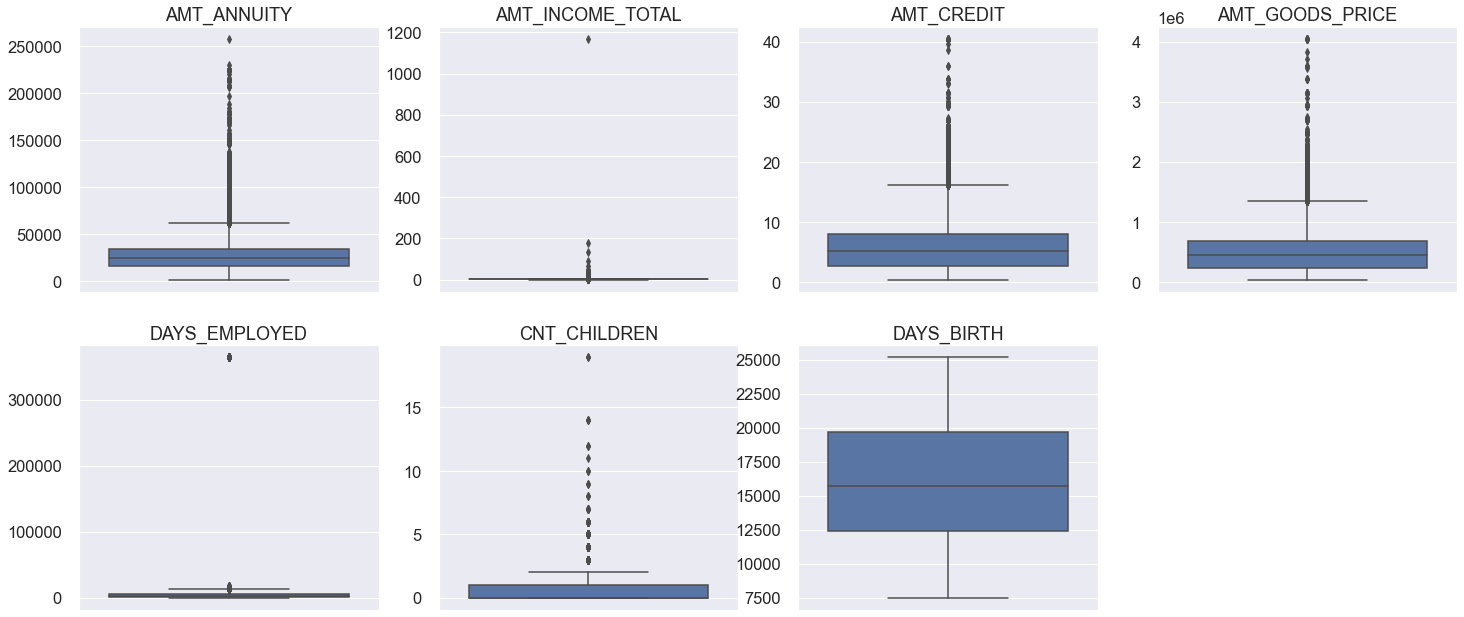

In [72]:
plt.figure(figsize=(22,10))

app_outlier_col_1 = ['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED']
app_outlier_col_2 = ['CNT_CHILDREN','DAYS_BIRTH']
for i in enumerate(app_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=applicationDF[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(app_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=applicationDF[i[1]])
    plt.title(i[1])
    plt.ylabel("")

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>It can be seen that in current application data
        <ol>
            <li>AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN have some number of outliers.</li>
            <li>AMT_INCOME_TOTAL has huge number of outliers which indicate that few of the loan applicants have high income when compared to the others.</li>
            <li>DAYS_BIRTH has no outliers which means the data available is reliable.</li>
            <li>DAYS_EMPLOYED has outlier values around 350000(days) which is around 958 years which is impossible and hence this has to be incorrect entry.</li>
        </ol>        
    </span>    
</div>
<p>
    <span style='font-family:Georgia'>
           We can see the stats for these columns below as well.
    </span>
</p>

In [73]:
applicationDF[['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].describe()

,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_BIRTH,CNT_CHILDREN,DAYS_EMPLOYED
count,307499.000000,307511.000000,307511.000000,3.072330e+05,307511.000000,307511.000000,307511.000000
mean,27108.573909,1.687979,5.990260,5.383962e+05,16036.995067,0.417052,67724.742149
std,14493.737315,2.371231,4.024908,3.694465e+05,4363.988632,0.722121,139443.751806
min,1615.500000,0.256500,0.450000,4.050000e+04,7489.000000,0.000000,0.000000
25%,16524.000000,1.125000,2.700000,2.385000e+05,12413.000000,0.000000,933.000000
50%,24903.000000,1.471500,5.135310,4.500000e+05,15750.000000,0.000000,2219.000000
75%,34596.000000,2.025000,8.086500,6.795000e+05,19682.000000,1.000000,5707.000000
max,258025.500000,1170.000000,40.500000,4.050000e+06,25229.000000,19.000000,365243.000000


<p>
    <span style='font-family:Georgia'>
           Finding outlier information in previousDF
    </span>
</p>

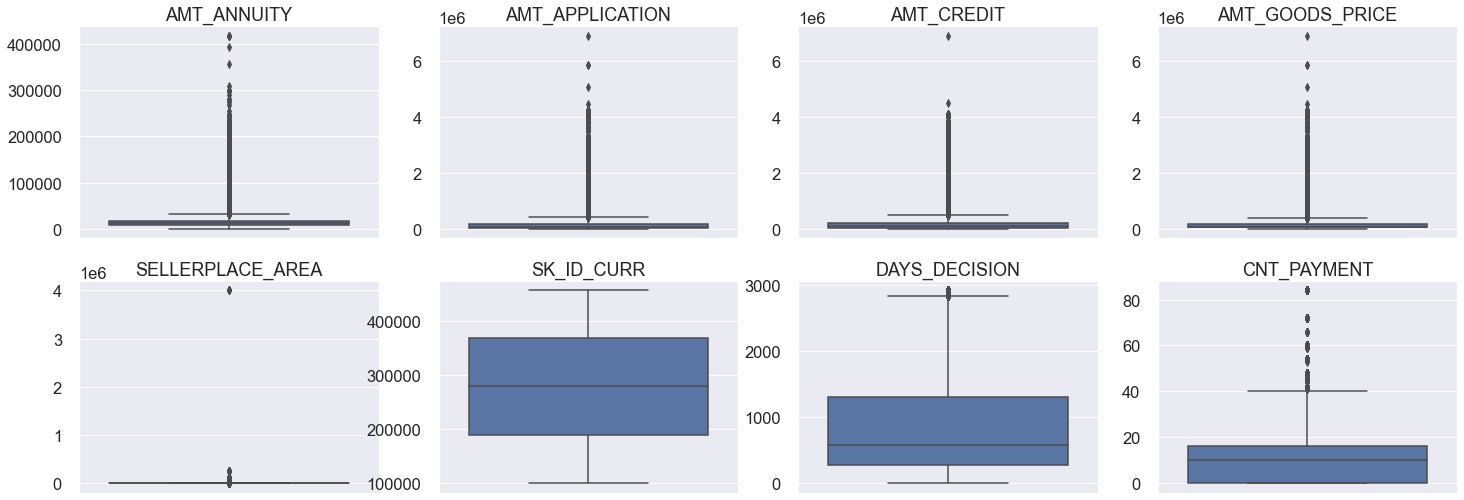

In [74]:
plt.figure(figsize=(22,8))

prev_outlier_col_1 = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA']
prev_outlier_col_2 = ['SK_ID_CURR','DAYS_DECISION','CNT_PAYMENT']
for i in enumerate(prev_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=previousDF[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(prev_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=previousDF[i[1]])
    plt.title(i[1])
    plt.ylabel("") 

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> It can be seen that in previous application data
        <ol>
            <li>AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have huge number of outliers.</li>
            <li>CNT_PAYMENT has few outlier values.</li>
            <li>SK_ID_CURR is an ID column and hence no outliers.</li>
            <li>DAYS_DECISION has little number of outliers indicating that these previous applications decisions were taken long back.</li>
        </ol>        
    </span>    
</div>
<p>
    <span style='font-family:Georgia'>
           We can see the stats for these columns below as well.
    </span>
</p>

In [75]:
previousDF[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'SELLERPLACE_AREA','CNT_PAYMENT','DAYS_DECISION']].describe()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_DECISION
count,1.670214e+06,1.670214e+06,1.670213e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06
mean,1.490651e+04,1.752339e+05,1.961140e+05,1.856429e+05,3.139511e+02,1.247621e+01,8.806797e+02
std,1.317751e+04,2.927798e+05,3.185746e+05,2.871413e+05,7.127443e+03,1.447588e+01,7.790997e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,1.000000e+00
25%,7.547096e+03,1.872000e+04,2.416050e+04,4.500000e+04,-1.000000e+00,0.000000e+00,2.800000e+02
50%,1.125000e+04,7.104600e+04,8.054100e+04,7.105050e+04,3.000000e+00,1.000000e+01,5.810000e+02
75%,1.682403e+04,1.803600e+05,2.164185e+05,1.804050e+05,8.200000e+01,1.600000e+01,1.300000e+03
max,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,4.000000e+06,8.400000e+01,2.922000e+03


<a id="analysis"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            5. Data Analysis
            </span>   
        </font>    
</h2>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy:</b> 
        <p>The data analysis flow has been planned in following way :</p>
        <ul>
            <li>Imbalance in Data</li>
            <li>Categorical Data Analysis</li>
            <ul>
                <li>Categorical segmented Univariate Analysis</li>
                <li>Categorical Bi/Multivariate analysis</li>
            </ul>
            <li>Numeric Data Analysis</li>
            <ul>
                <li>Bi-furcation of databased based on TARGET data</li>
                <li>Correlation Matrix</li>
                <li>Numerical segmented Univariate Analysis</li>
                <li>Numerical Bi/Multivariate analysis</li>
            </ul> 
        </ul>
    </span>    
</div>

<a id="imbalance"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
             5.1 Imbalance Analysis
            </span>   
        </font>    
</h3>

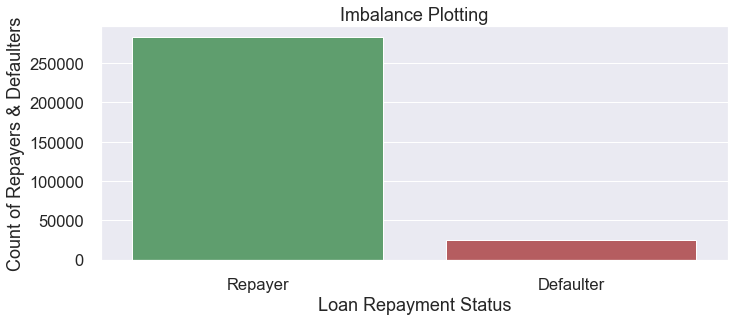

In [76]:
Imbalance = applicationDF["TARGET"].value_counts().reset_index()

plt.figure(figsize=(10,4))
x= ['Repayer','Defaulter']
sns.barplot(x,"TARGET",data = Imbalance,palette= ['g','r'])
plt.xlabel("Loan Repayment Status")
plt.ylabel("Count of Repayers & Defaulters")
plt.title("Imbalance Plotting")
plt.show()

In [77]:
count_0 = Imbalance.iloc[0]["TARGET"]
count_1 = Imbalance.iloc[1]["TARGET"]
count_0_perc = round(count_0/(count_0+count_1)*100,2)
count_1_perc = round(count_1/(count_0+count_1)*100,2)

print('Ratios of imbalance in percentage with respect to Repayer and Defaulter datas are: %.2f and %.2f'%(count_0_perc,count_1_perc))
print('Ratios of imbalance in relative with respect to Repayer and Defaulter datas is %.2f : 1 (approx)'%(count_0/count_1))

Ratios of imbalance in percentage with respect to Repayer and Defaulter datas are: 91.93 and 8.07
Ratios of imbalance in relative with respect to Repayer and Defaulter datas is 11.39 : 1 (approx)


<a id="oltfunc"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
             5.2 Plotting Functions
            </span>   
        </font>    
</h3>

<p>
    <span style='font-family:Georgia'>
           Following are the common functions customized to perform uniform anaysis that is called for all plots:
    </span>
</p>

In [78]:
# function for plotting repetitive countplots in univariate categorical analysis on applicationDF
# This function will create two subplots: 
# 1. Count plot of categorical column w.r.t TARGET; 
# 2. Percentage of defaulters within column

def univariate_categorical(feature,ylog=False,label_rotation=False,horizontal_layout=True):
    temp = applicationDF[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = applicationDF[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc["TARGET"] = cat_perc["TARGET"]*100
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))
        
    # 1. Subplot 1: Count plot of categorical column
    # sns.set_palette("Set2")
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=applicationDF,
                    hue ="TARGET",
                    order=cat_perc[feature],
                    palette=['g','r'])
    
    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize' : 12, 'fontweight' : 3, 'color' : 'Blue'}) 
    ax1.legend(['Repayer','Defaulter'])
    
    # If the plot is not readable, use the log scale.
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})   
    
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='TARGET', 
                    order=cat_perc[feature], 
                    data=cat_perc,
                    palette='Set2')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of Defaulters [%]', fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=12)
    ax2.set_title(feature + " Defaulter %", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 

    plt.show()

In [79]:
# function for plotting repetitive countplots in bivariate categorical analysis

def bivariate_bar(x,y,df,hue,figsize):
    
    plt.figure(figsize=figsize)
    sns.barplot(x=x,
                  y=y,
                  data=df, 
                  hue=hue, 
                  palette =['g','r'])     
        
    # Defining aesthetics of Labels and Title of the plot using style dictionaries
    plt.xlabel(x,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.ylabel(y,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.title(col, fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.xticks(rotation=90, ha='right')
    plt.legend(labels = ['Repayer','Defaulter'])
    plt.show()

In [80]:
# function for plotting repetitive rel plots in bivaritae numerical analysis on applicationDF

def bivariate_rel(x,y,data, hue, kind, palette, legend,figsize):
    
    plt.figure(figsize=figsize)
    sns.relplot(x=x, 
                y=y, 
                data=applicationDF, 
                hue="TARGET",
                kind=kind,
                palette = ['g','r'],
                legend = False)
    plt.legend(['Repayer','Defaulter'])
    plt.xticks(rotation=90, ha='right')
    plt.show()

In [81]:
#function for plotting repetitive countplots in univariate categorical analysis on the merged df

def univariate_merged(col,df,hue,palette,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col, 
                  data=df,
                  hue= hue,
                  palette= palette,
                  order=df[col].value_counts().index)
    

    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})     
    else:
        plt.ylabel("Count",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})       

    plt.title(col , fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.legend(loc = "upper right")
    plt.xticks(rotation=90, ha='right')
    
    plt.show()

In [82]:
# Function to plot point plots on merged dataframe

def merged_pointplot(x,y):
    plt.figure(figsize=(8,4))
    sns.pointplot(x=x, 
                  y=y, 
                  hue="TARGET", 
                  data=loan_process_df,
                  palette =['g','r'])
   # plt.legend(['Repayer','Defaulter'])

<a id="catvar"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
             5.3 Categorical Variables Analysis
            </span>   
        </font>    
</h3>

<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
             5.3.1 Segmented Univariate Analysis
            </span>   
        </font>    
</h4>

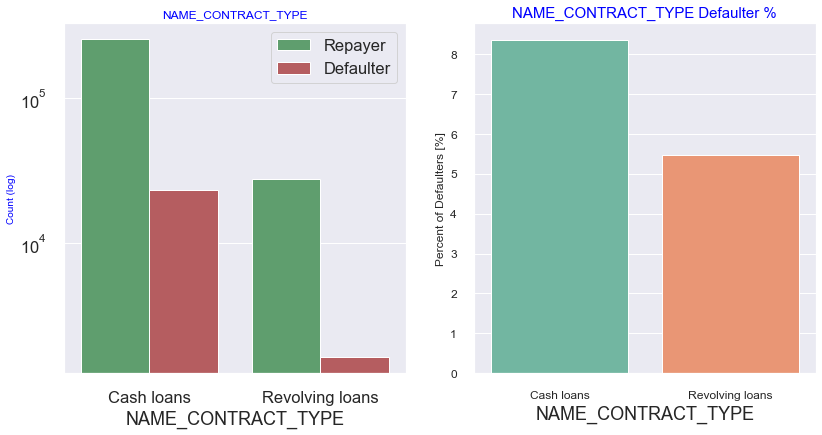

In [83]:
# Checking the contract type based on loan repayment status
univariate_categorical('NAME_CONTRACT_TYPE',True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> <br>Contract type: Revolving loans are just a small fraction (10%) from the total number of loans; in the same time, a larger amount of Revolving loans, comparing with their frequency, are not repaid. 
    </span>    
</div>

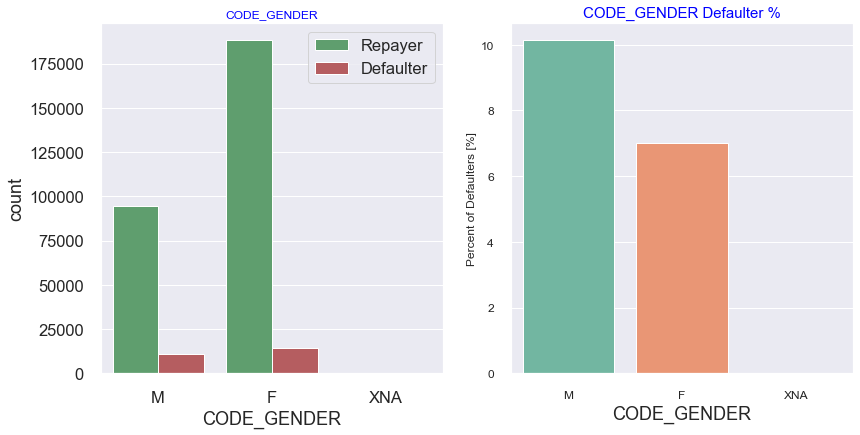

In [84]:
# Checking the type of Gender on loan repayment status
univariate_categorical('CODE_GENDER')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> <br>The number of female clients is almost double the number of male clients. Based on the percentage of defaulted credits, males have a higher chance of not returning their loans (~10%), comparing with women (~7%)  
    </span>    
</div>

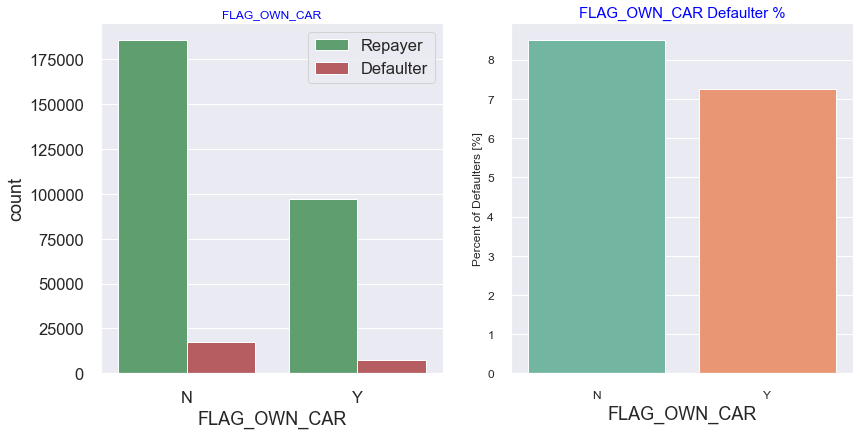

In [85]:
# Checking if owning a car is related to loan repayment status
univariate_categorical('FLAG_OWN_CAR')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <br>Clients who own a car are half in number of the clients who dont own a car. But based on the percentage of deault, there is no correlation between owning a car and loan repayment as in both cases the default percentage is almost same.      
    </span>    
</div>

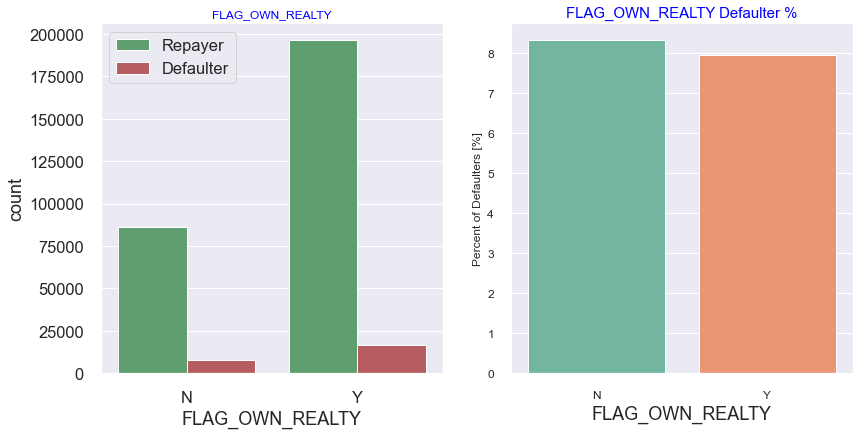

In [86]:
# Checking if owning a realty is related to loan repayment status
univariate_categorical('FLAG_OWN_REALTY')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <br>The clients who own real estate are more than double of the ones that don't own. But the defaulting rate of both categories are around the same (~8%). Thus there is no correlation between owning a reality and defaulting the loan.      
    </span>    
</div>

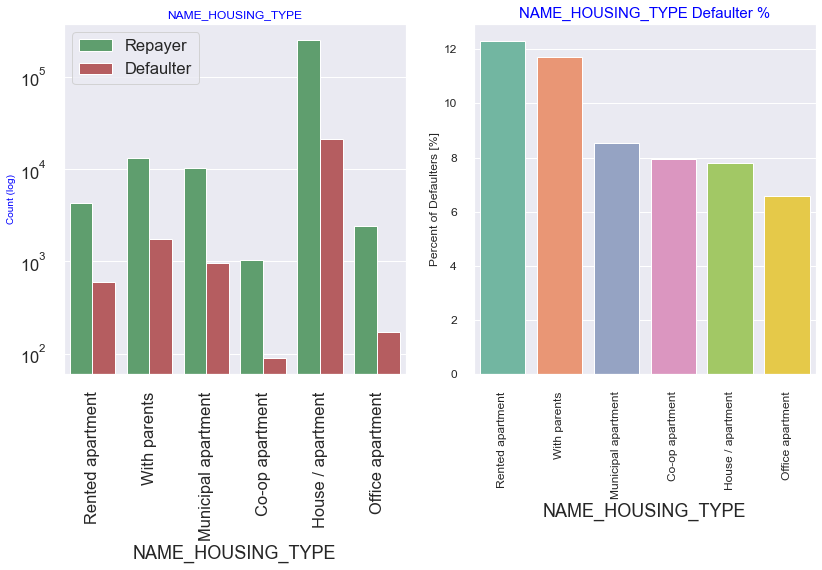

In [87]:
# Analyzing Housing Type based on loan repayment status
univariate_categorical("NAME_HOUSING_TYPE",True,True,True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <ol>
            <li>Majority of people live in House/apartment</li>
            <li>People living in office apartments have lowest default rate</li>
            <li>People living with parents (~11.5%) and living in rented apartments(>12%) have higher probability of defaulting </li>
        </ol>
    </span>    
</div>

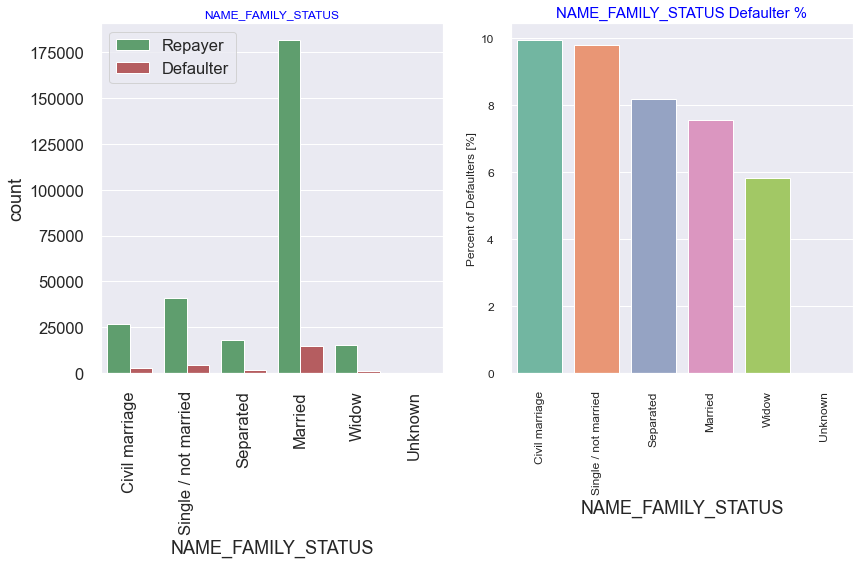

In [88]:
# Analyzing Family status based on loan repayment status
univariate_categorical("NAME_FAMILY_STATUS",False,True,True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <ol>
            <li>Most of the people who have taken loan are married, followed by Single/not married and civil marriage </li>
            <li>In terms of percentage of not repayment of loan, Civil marriage has the highest percent of not repayment (10%), with Widow the lowest (exception being Unknown). </li>
        </ol>
    </span>    
</div>

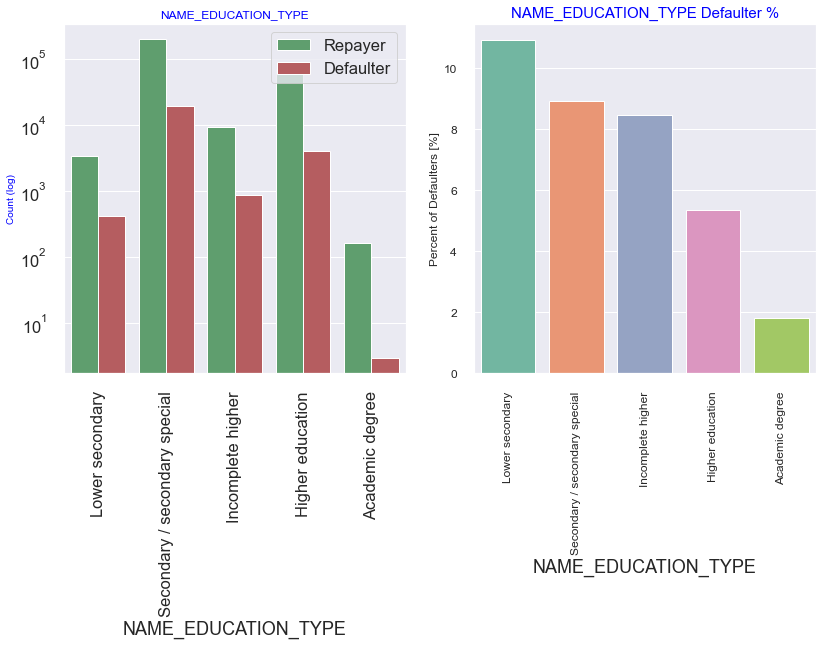

In [89]:
# Analyzing Education Type based on loan repayment status
univariate_categorical("NAME_EDUCATION_TYPE",True,True,True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <ol>
            <li>Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. Only a very small number having an academic degree</li>
            <li>The Lower secondary category, although rare, have the largest rate of not returning the loan (11%). The people with Academic degree have less than 2% defaulting rate. </li>
        </ol>
    </span>    
</div>

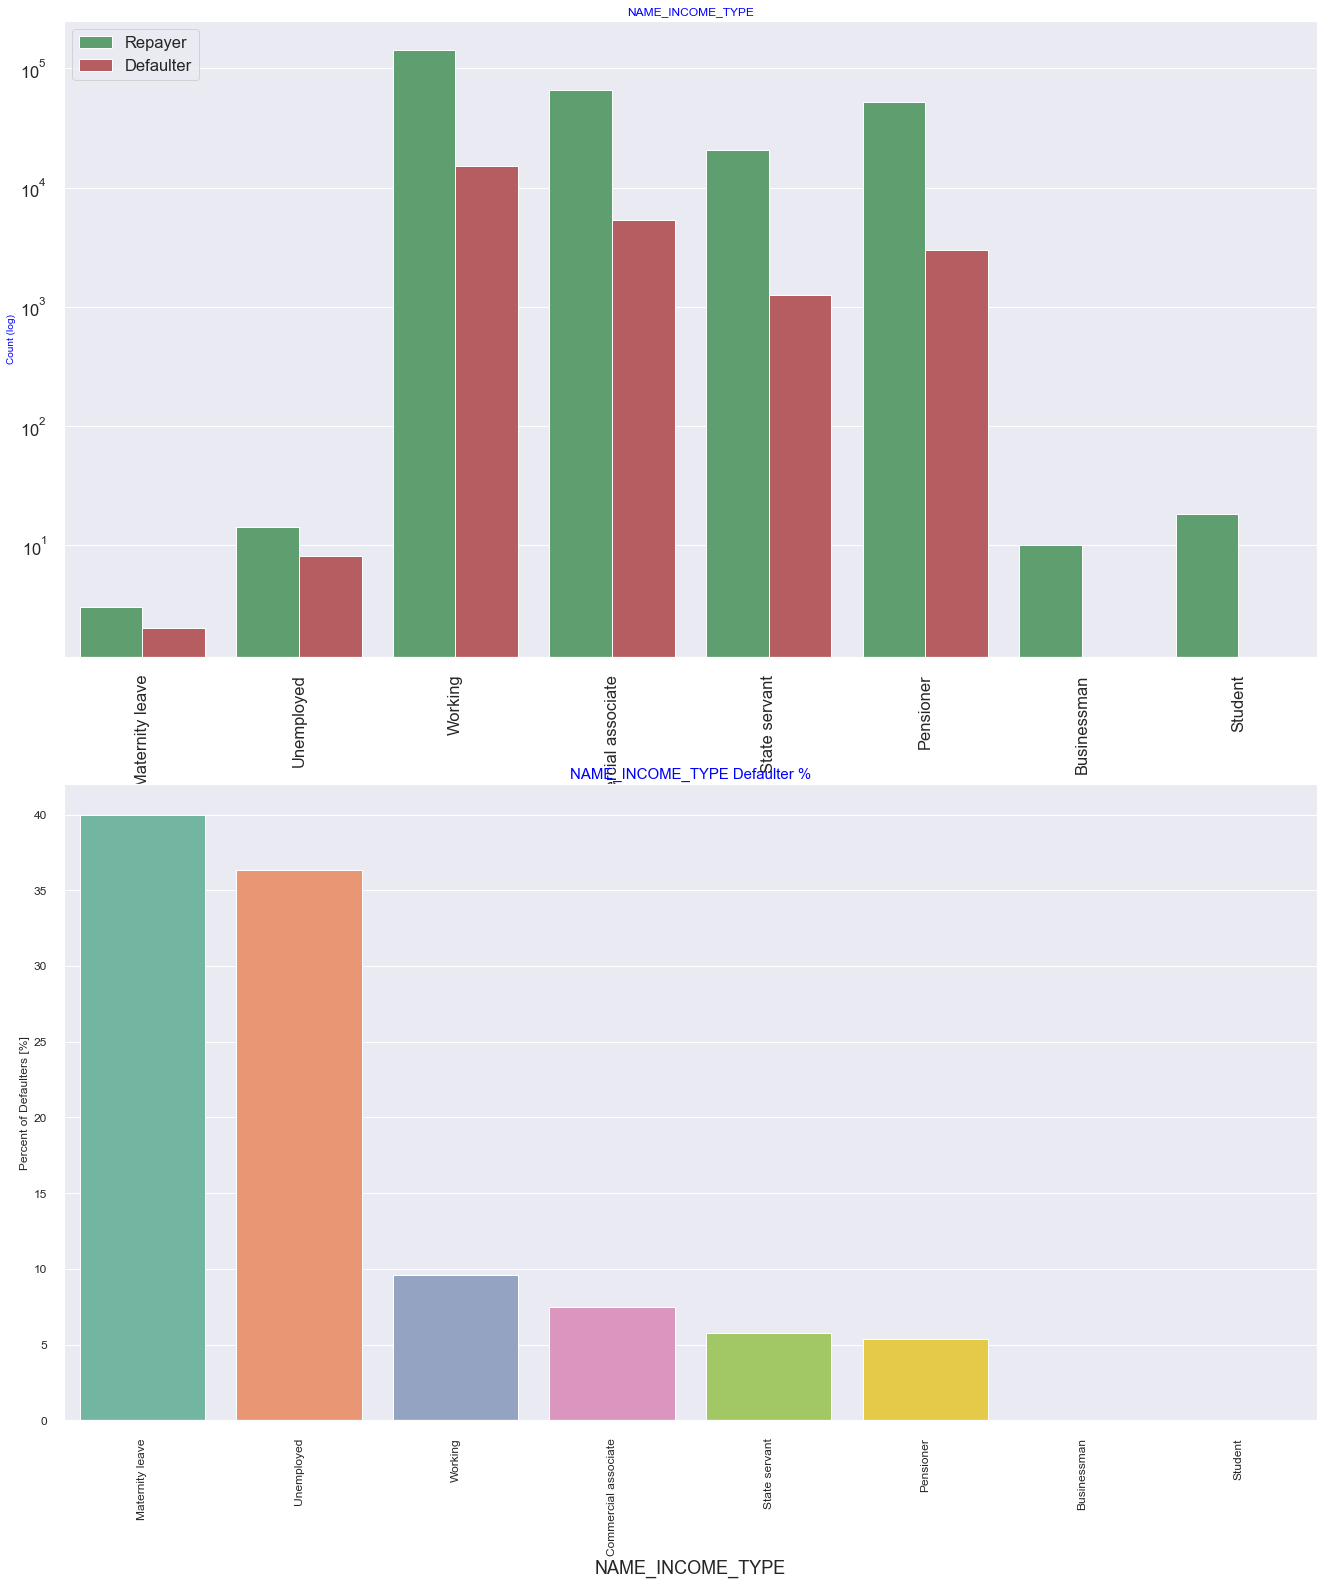

In [90]:
# Analyzing Income Type based on loan repayment status
univariate_categorical("NAME_INCOME_TYPE",True,True,False)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <ul>
            <li>Most of applicants for loans have income type as Working, followed by Commercial associate, Pensioner and State servant.</li>
            <li>The applicants with the type of income Maternity leave have almost 40% ratio of not returning loans, followed by Unemployed (37%). The rest of types of incomes are under the average of 10% for not returning loans.</li>
            <li>Student and Businessmen, though less in numbers do not have any default record. Thus these two category are <b>safest</b> for providing loan.</li>  
        </ul>
    </span>    
</div>

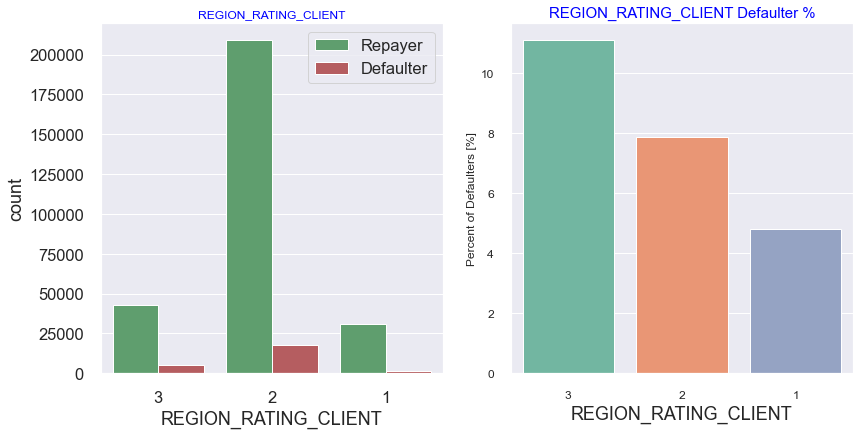

In [91]:
# Analyzing Region rating where applicant lives based on loan repayment status
univariate_categorical("REGION_RATING_CLIENT",False,False,True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <ol>
            <li>Most of the applicants are living in Region_Rating 2 place.</li>
            <li>Region Rating 3 has the highest default rate (11%)</li>
            <li>Applicant living in Region_Rating 1 has the lowest probability of defaulting, thus <b>safer</b> for approving loans </li>
        </ol>
    </span>    
</div>

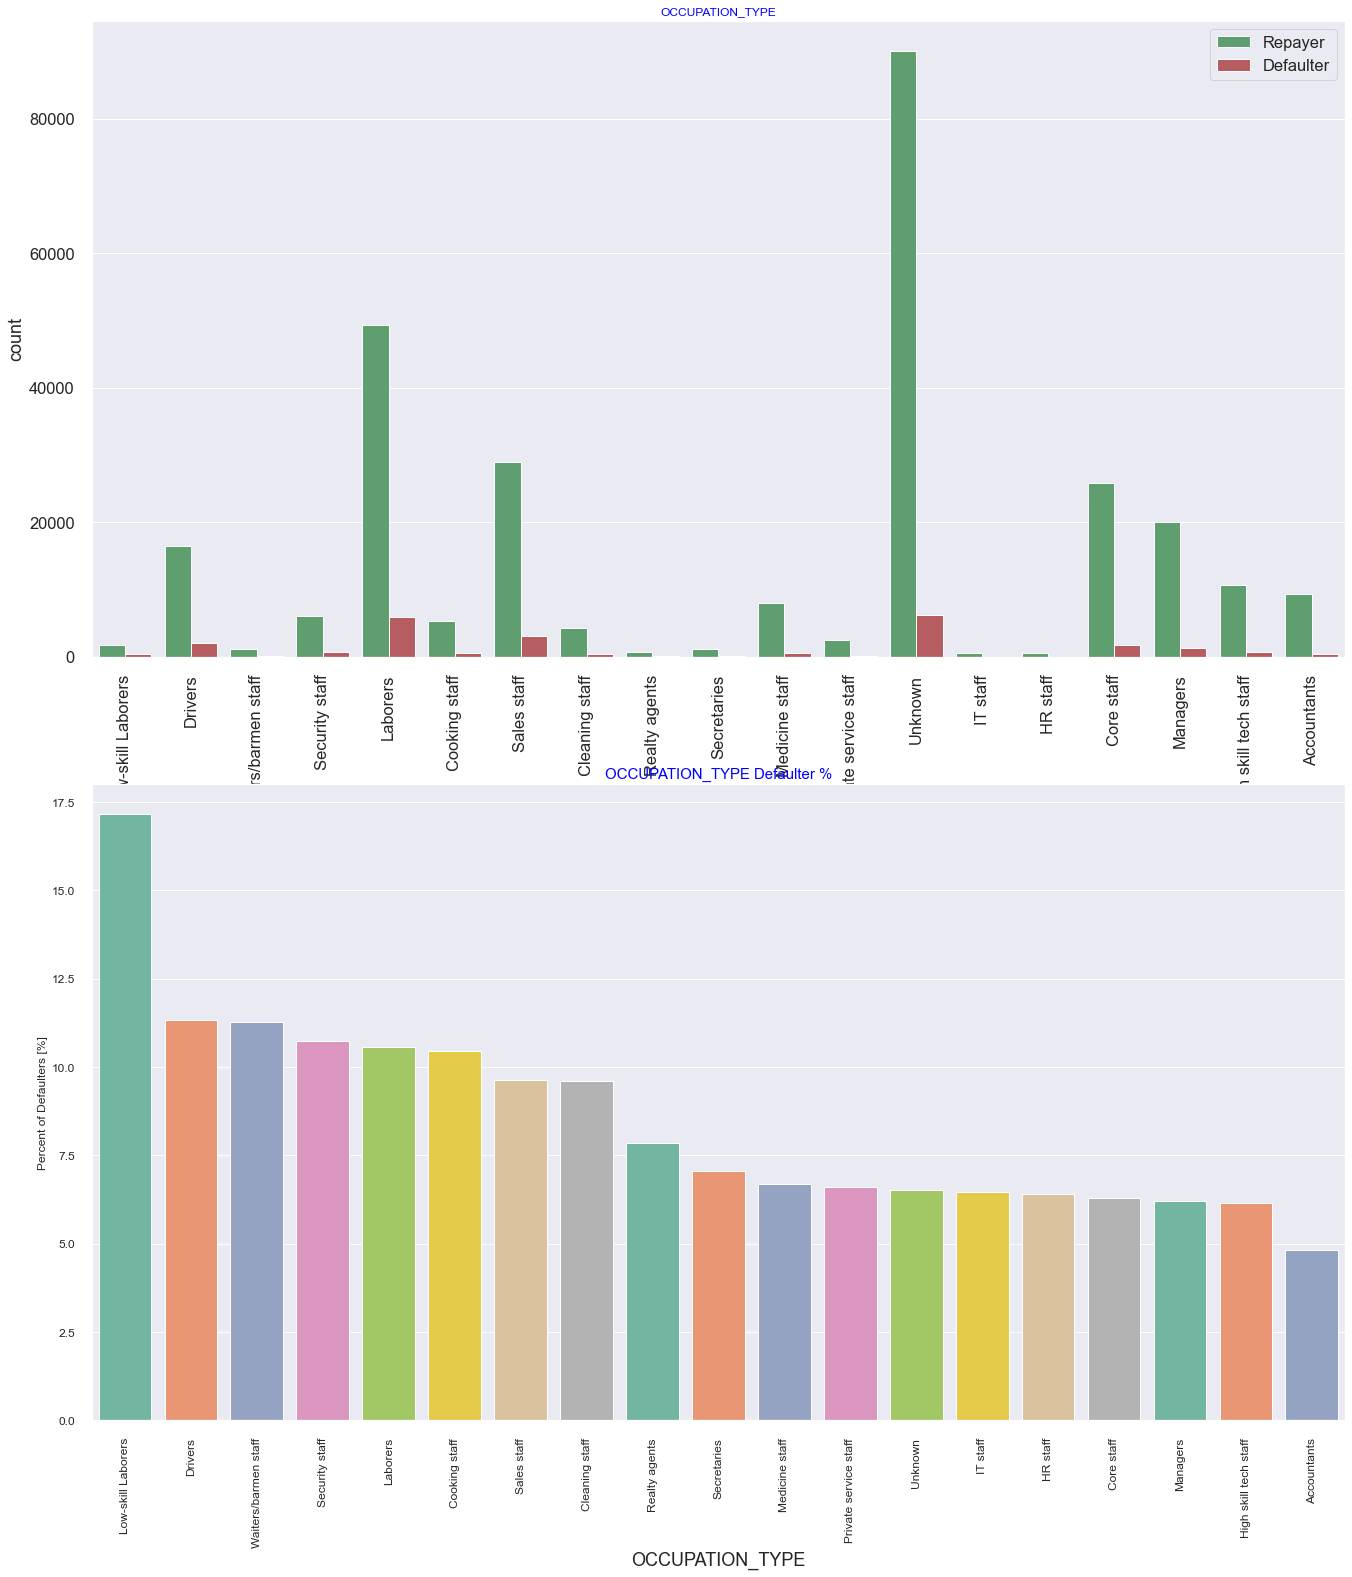

In [92]:
# Analyzing Occupation Type where applicant lives based on loan repayment status
univariate_categorical("OCCUPATION_TYPE",False,True,False)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <ol>
            <li>Most of the loans are taken by Laborers, followed by Sales staff. IT staff take the lowest amount of loans.</li>
            <li>The category with highest percent of not repaid loans are Low-skill Laborers (above 17%), followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff. </li>
        </ol>
    </span>    
</div>

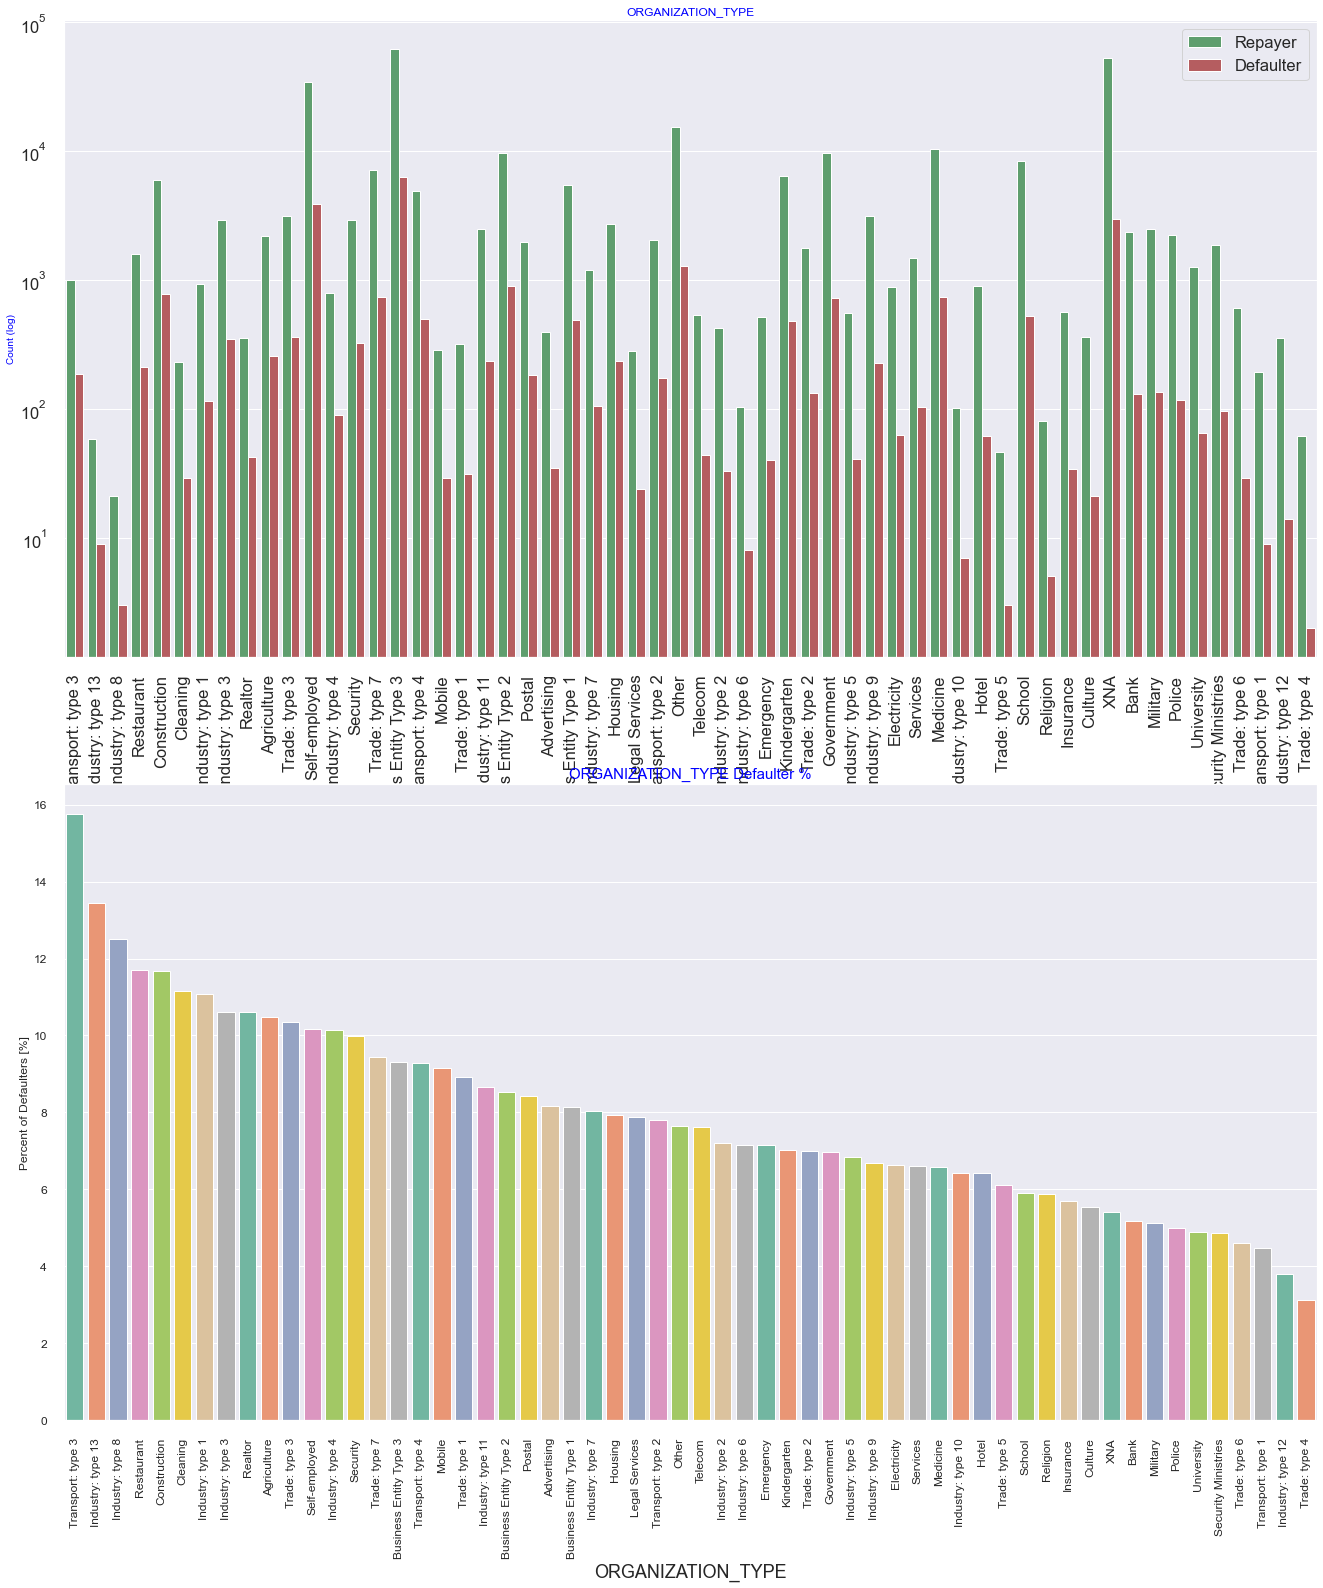

In [93]:
# Checking Loan repayment status based on Organization type
univariate_categorical("ORGANIZATION_TYPE",True,True,False)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <ol>
            <li>Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). Self employed people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.</li>
            <li>Most of the people application for loan are from Business Entity Type 3 </li>
            <li>For a very high number of applications, Organization type information is unavailable(XNA)</li>
        </ol>
        It can be seen that following category of organization type has lesser defaulters thus safer for providing loans:
        <ul>
            <li>Trade Type 4 and 5</li>
            <li>Industry type 8</li>
        </ul>
    </span>    
</div>

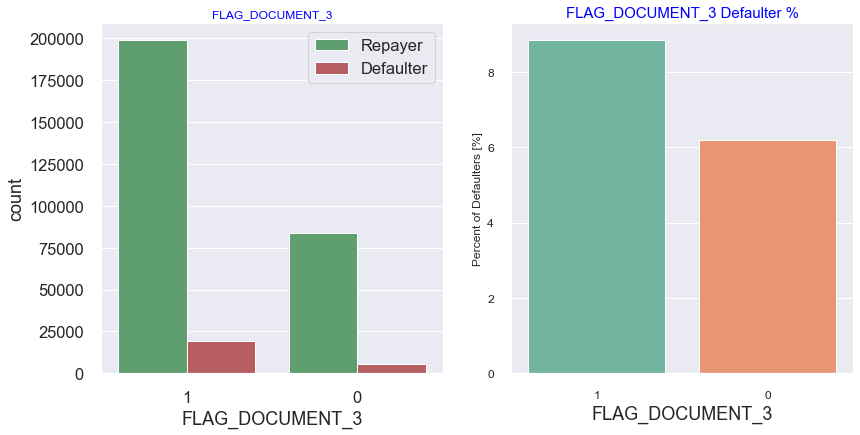

In [94]:
# Analyzing Flag_Doc_3 submission status based on loan repayment status
univariate_categorical("FLAG_DOCUMENT_3",False,False,True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <br>There is no significant correlation between repayers and defaulters in terms of submitting document 3 as we see even if applicants have submitted the document, they have defaulted a slightly more (~9%) than who have not submitted the document (6%)
    </span>    
</div>

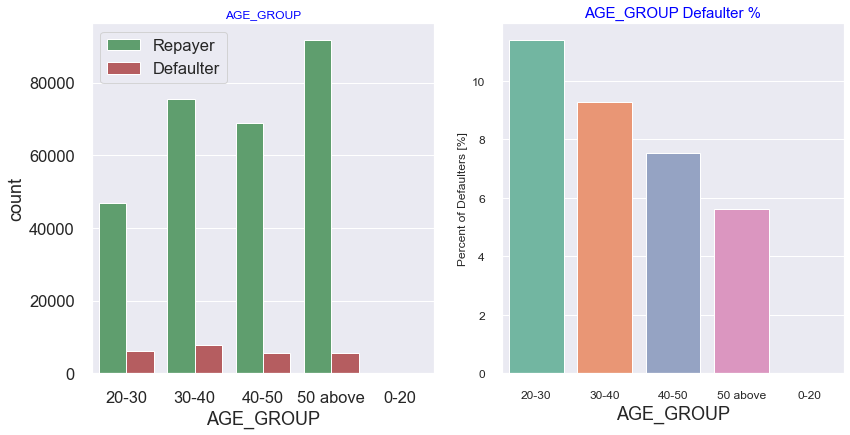

In [95]:
# Analyzing Age Group based on loan repayment status
univariate_categorical("AGE_GROUP",False,False,True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <ol>
            <li>People in the age group range 20-40 have higher probability of defaulting</li>
            <li>People above age of 50 have low probability of defailting </li>
        </ol>
    </span>    
</div>

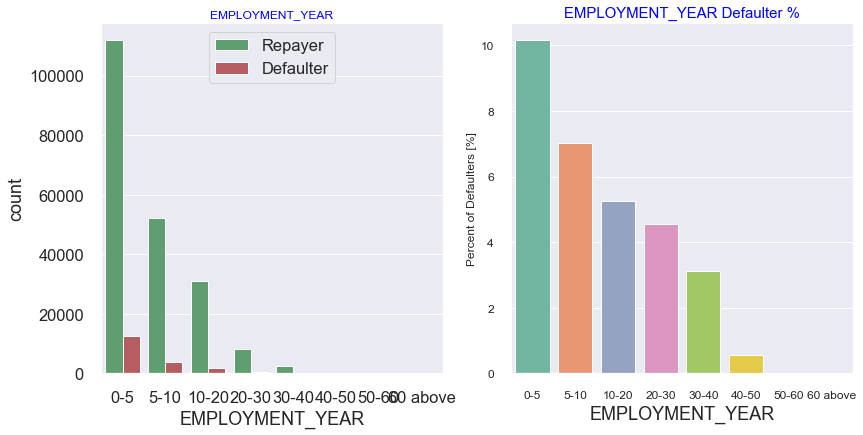

In [96]:
# Analyzing Employment_Year based on loan repayment status
univariate_categorical("EMPLOYMENT_YEAR",False,False,True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <ol>
            <li>Majority of the applicants have been employeed in between 0-5 years. The defaulting rating of this group is also the highest which is 10%</li>
            <li>With increase of employment year, defaulting rate is gradually decreasing with people having 40+ year experience having less than 1% default rate </li>
        </ol>
    </span>    
</div>

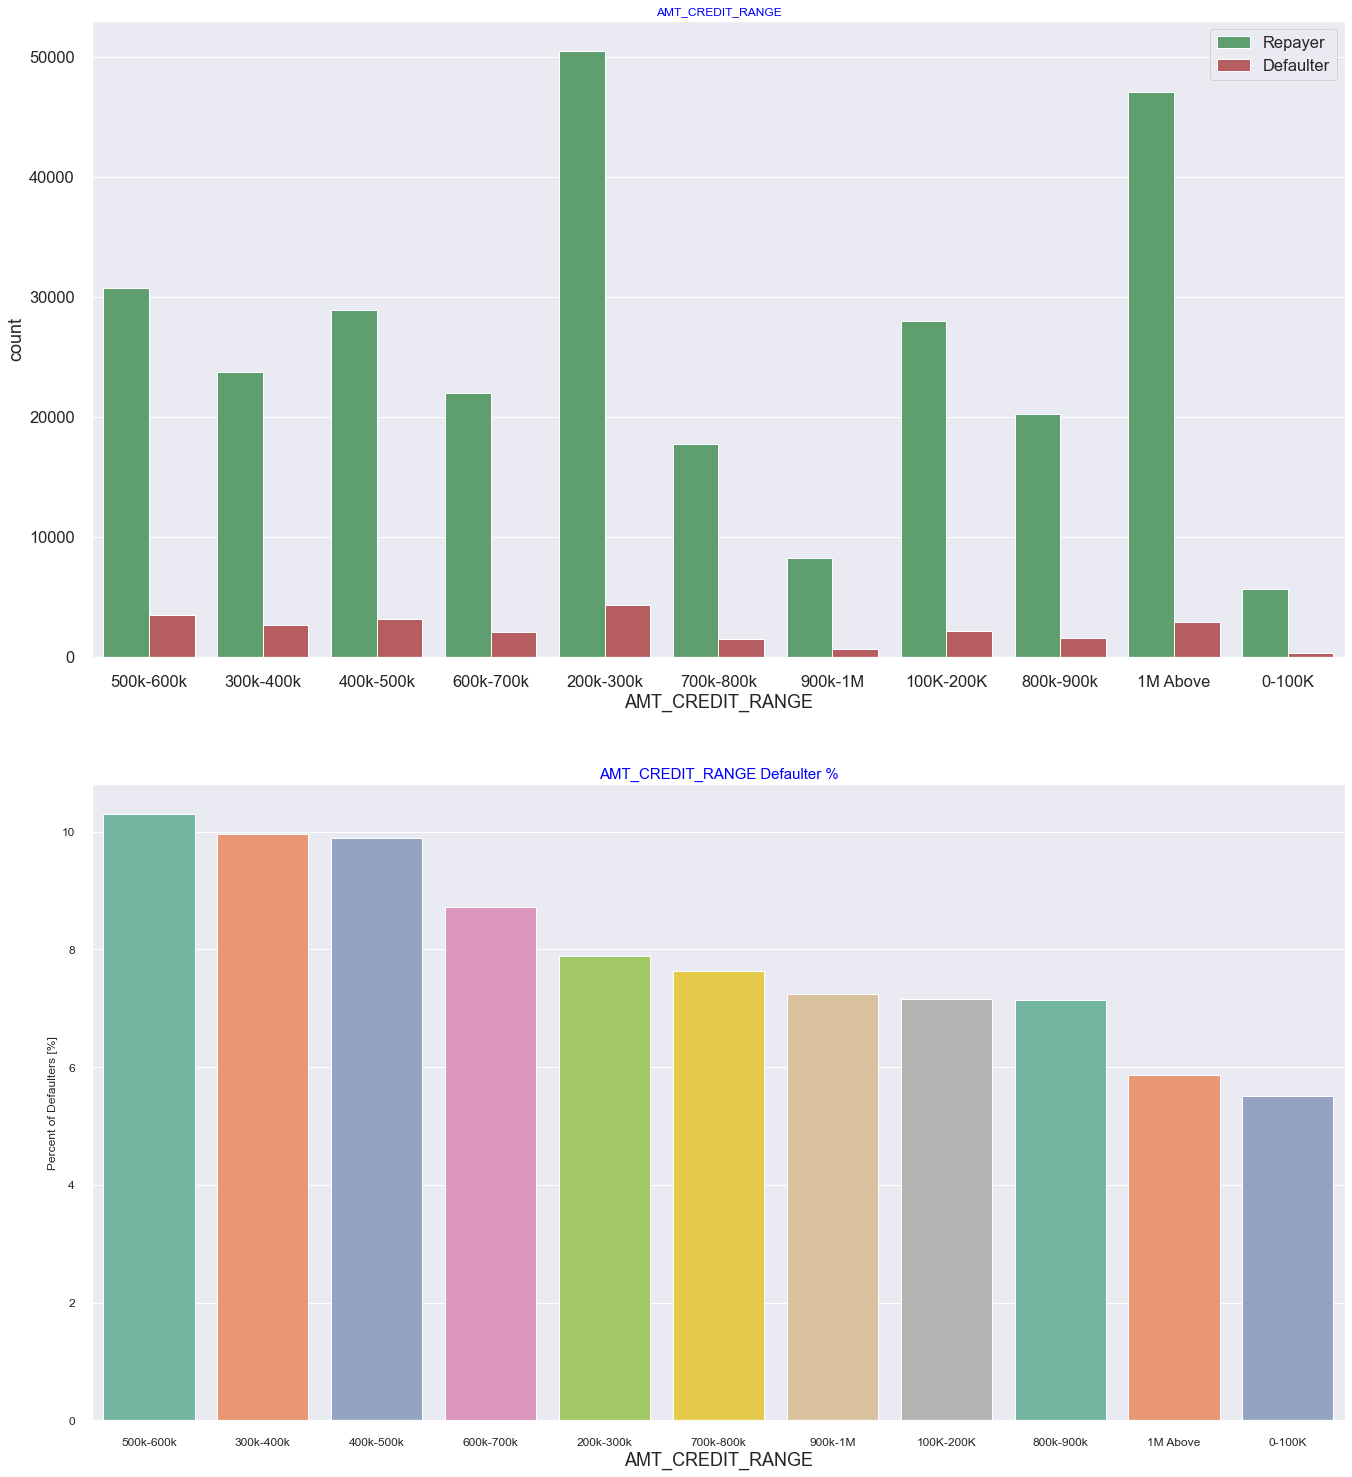

In [97]:
# Analyzing Amount_Credit based on loan repayment status
univariate_categorical("AMT_CREDIT_RANGE",False,False,False)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <ol>
            <li>More than 80% of the loan provided are for amount less than 900,000</li>
            <li>People who get loan for 300-600k tend to default more than others. </li>
        </ol>
    </span>    
</div>

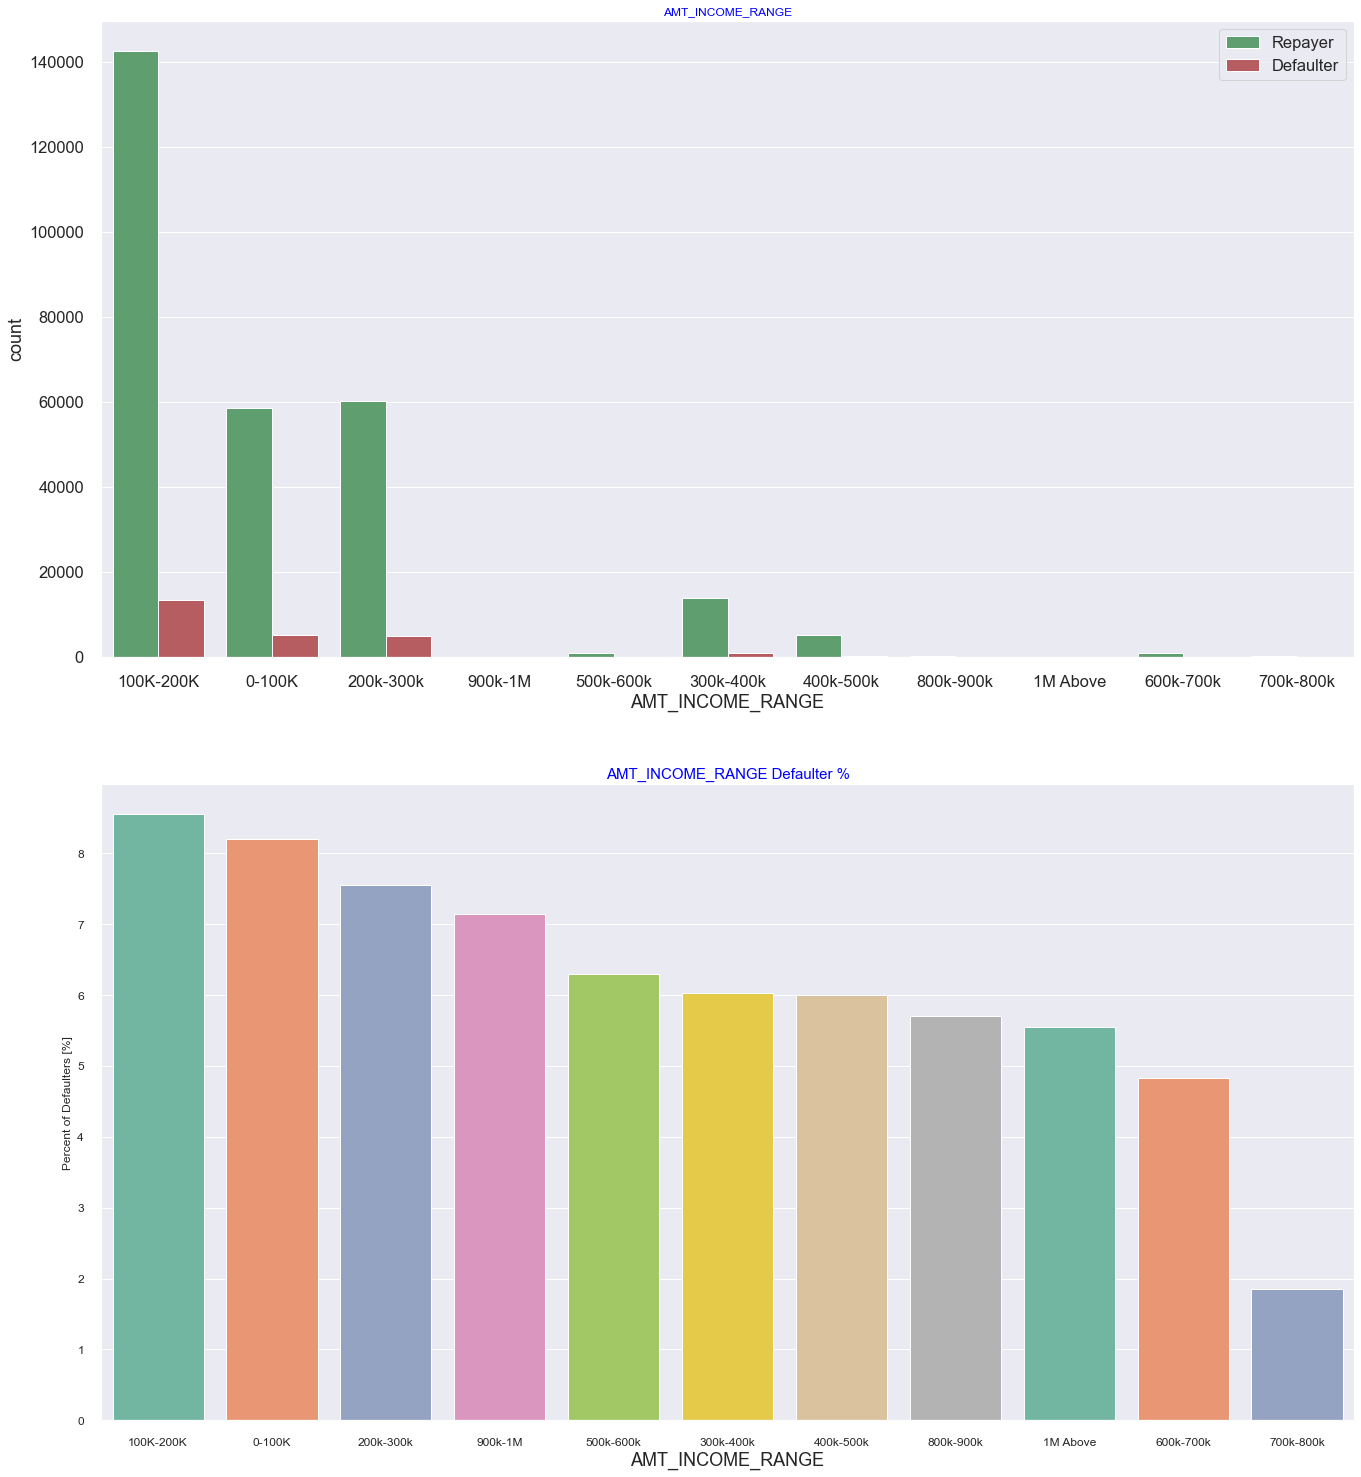

In [98]:
# Analyzing Amount_Income Range based on loan repayment status
univariate_categorical("AMT_INCOME_RANGE",False,False,False)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <ol>
            <li>90% of the applications have Income total less than 300,000</li>
            <li>Application with Income less than 300,000 has high probability of defaulting</li>
            <li>Applicant with Income more than 700,000 are less likely to default </li>
        </ol>
    </span>    
</div>

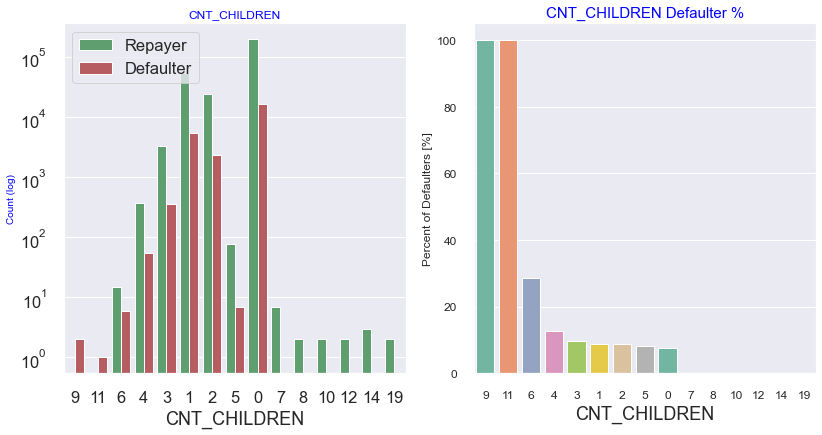

In [99]:
# Analyzing Number of children based on loan repayment status
univariate_categorical("CNT_CHILDREN",True)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <ol>
            <li>Most of the applicants do not have children</li>
            <li>Very few clients have more than 3 children.</li>
            <li>Client who have more than 4 children has a very high default rate with child count 9 and 11 showing 100% default rate</li>
        </ol>
    </span>    
</div>

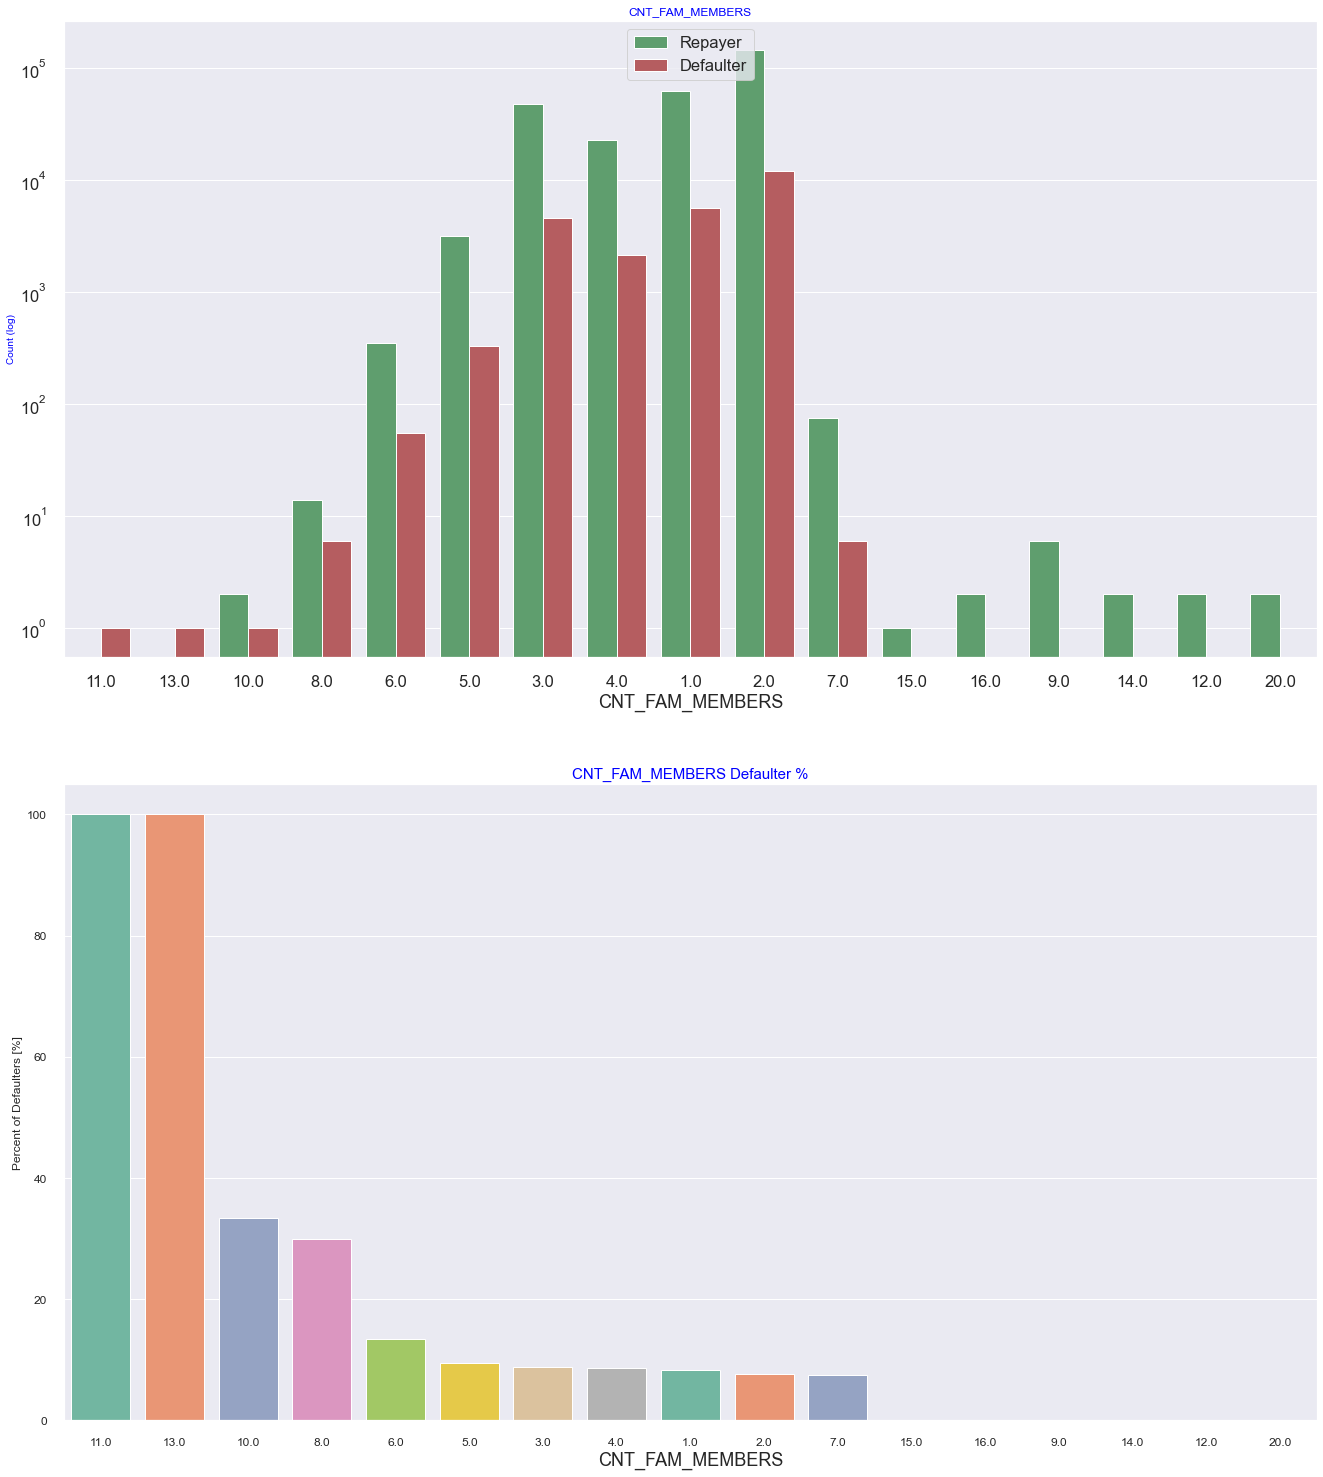

In [100]:
# Analyzing Number of family members based on loan repayment status
univariate_categorical("CNT_FAM_MEMBERS",True, False, False)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <br>Family member follows the same trend as children where having more family members increases the risk of defaulting
    </span>    
</div>

<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
             5.3.2 Categorical Bi/Multivariate Analysis
            </span>   
        </font>    
</h4>

In [101]:
applicationDF.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
NAME_INCOME_TYPE,,,,,,,,
Businessman,10.0,6.525000,6.272260,1.8000,2.250,4.9500,8.43750,22.5000
Commercial associate,71617.0,2.029553,1.479742,0.2655,1.350,1.8000,2.25000,180.0009
Maternity leave,5.0,1.404000,1.268569,0.4950,0.675,0.9000,1.35000,3.6000
Pensioner,55362.0,1.364013,0.766503,0.2565,0.900,1.1700,1.66500,22.5000
State servant,21703.0,1.797380,1.008806,0.2700,1.125,1.5750,2.25000,31.5000
Student,18.0,1.705000,1.066447,0.8100,1.125,1.5750,1.78875,5.6250
Unemployed,22.0,1.105364,0.880551,0.2655,0.540,0.7875,1.35000,3.3750
Working,158774.0,1.631699,3.075777,0.2565,1.125,1.3500,2.02500,1170.0000


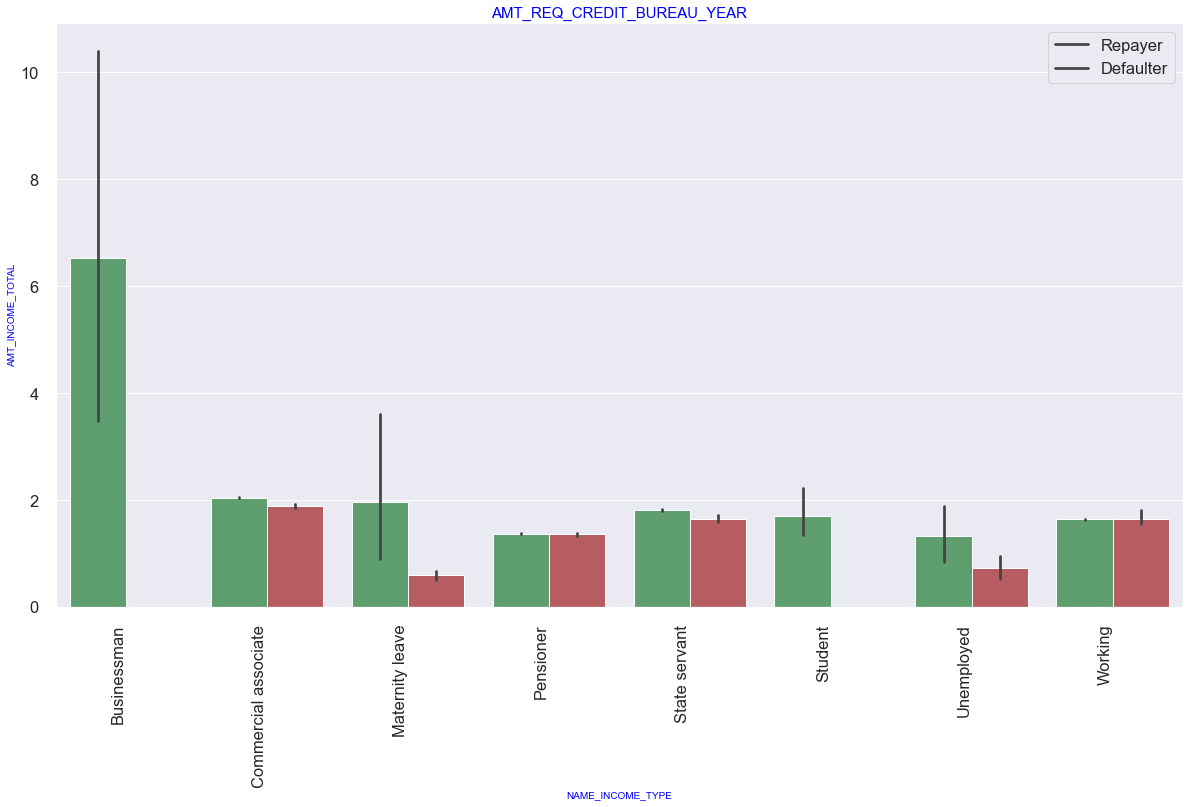

In [102]:
# Income type vs Income Amount Range
bivariate_bar("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",applicationDF,"TARGET",(18,10))

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <br>It can be seen that business man's income is the highest and the estimated range with default 95% confidence level seem to indicate that the income of a business man could be in the range of slightly close to 4 lakhs and slightly above 10 lakhs
    </span>    
</div>

<a id="numvar"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
             5.4 Numeric Variables Analysis
            </span>   
        </font>    
</h3>

<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
             5.4.1 Bifurcating the applicationDF dataframe based on Target value 0 and 1 for correlation and other analysis
            </span>   
        </font>    
</h4>

In [103]:
applicationDF.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CRED

In [104]:
# Bifurcating the applicationDF dataframe based on Target value 0 and 1 for correlation and other analysis
cols_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


Repayer_df = applicationDF.loc[applicationDF['TARGET']==0, cols_for_correlation] # Repayers
Defaulter_df = applicationDF.loc[applicationDF['TARGET']==1, cols_for_correlation] # Defaulters

<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
             5.4.2 Correlation between numeric variable
            </span>   
        </font>    
</h4>

In [105]:
# Getting the top 10 correlation for the Repayers data
corr_repayer = Repayer_df.corr()
corr_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool))
corr_df_repayer = corr_repayer.unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

,VAR1,VAR2,Correlation
94,AMT_GOODS_PRICE,AMT_CREDIT,0.987250
230,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
95,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686
71,AMT_ANNUITY,AMT_CREDIT,0.771309
167,DAYS_EMPLOYED,DAYS_BIRTH,0.626114
70,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953
93,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349462
47,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799
138,DAYS_BIRTH,CNT_CHILDREN,0.336966
190,DAYS_REGISTRATION,DAYS_BIRTH,0.333151


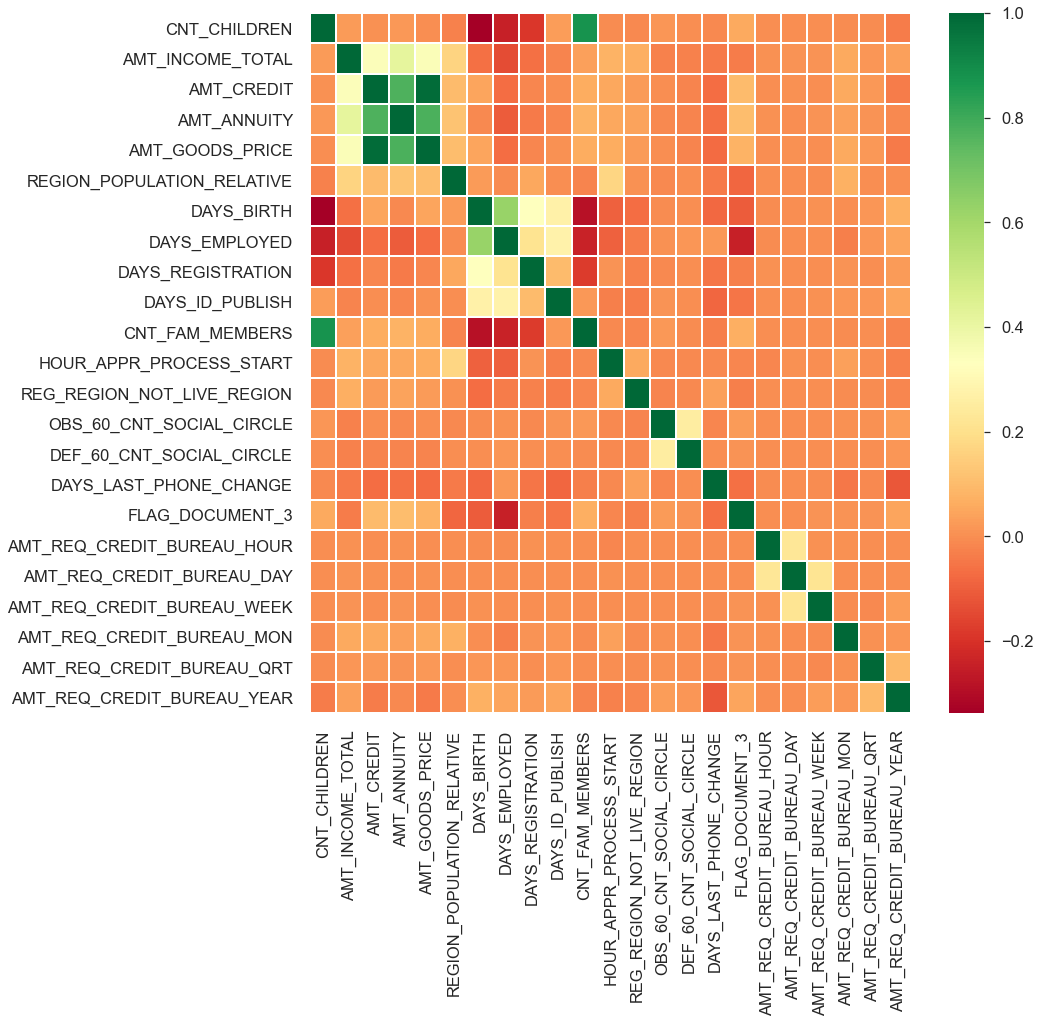

In [106]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(Repayer_df.corr(), cmap="RdYlGn",annot=False,linewidth =1)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <br>Correlating factors amongst repayers:<br>
            Credit amount is highly correlated with
            <ul>                
                <li> amount of goods price</li>
                <li> loan annuity</li>
                <li> total income</li>
        </ul>
        We can also see that repayers have high correlation in number of days employed.
    </span>    
</div>

In [107]:
# Getting the top 10 correlation for the Defaulter data
corr_Defaulter = Defaulter_df.corr()
corr_Defaulter = corr_Defaulter.where(np.triu(np.ones(corr_Defaulter.shape),k=1).astype(np.bool))
corr_df_Defaulter = corr_Defaulter.unstack().reset_index()
corr_df_Defaulter.columns =['VAR1','VAR2','Correlation']
corr_df_Defaulter.dropna(subset = ["Correlation"], inplace = True)
corr_df_Defaulter["Correlation"]=corr_df_Defaulter["Correlation"].abs()
corr_df_Defaulter.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_Defaulter.head(10)

,VAR1,VAR2,Correlation
94,AMT_GOODS_PRICE,AMT_CREDIT,0.983103
230,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484
95,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699
71,AMT_ANNUITY,AMT_CREDIT,0.752195
167,DAYS_EMPLOYED,DAYS_BIRTH,0.582185
190,DAYS_REGISTRATION,DAYS_BIRTH,0.289114
375,FLAG_DOCUMENT_3,DAYS_EMPLOYED,0.272169
335,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.264159
138,DAYS_BIRTH,CNT_CHILDREN,0.259109
213,DAYS_ID_PUBLISH,DAYS_BIRTH,0.252863


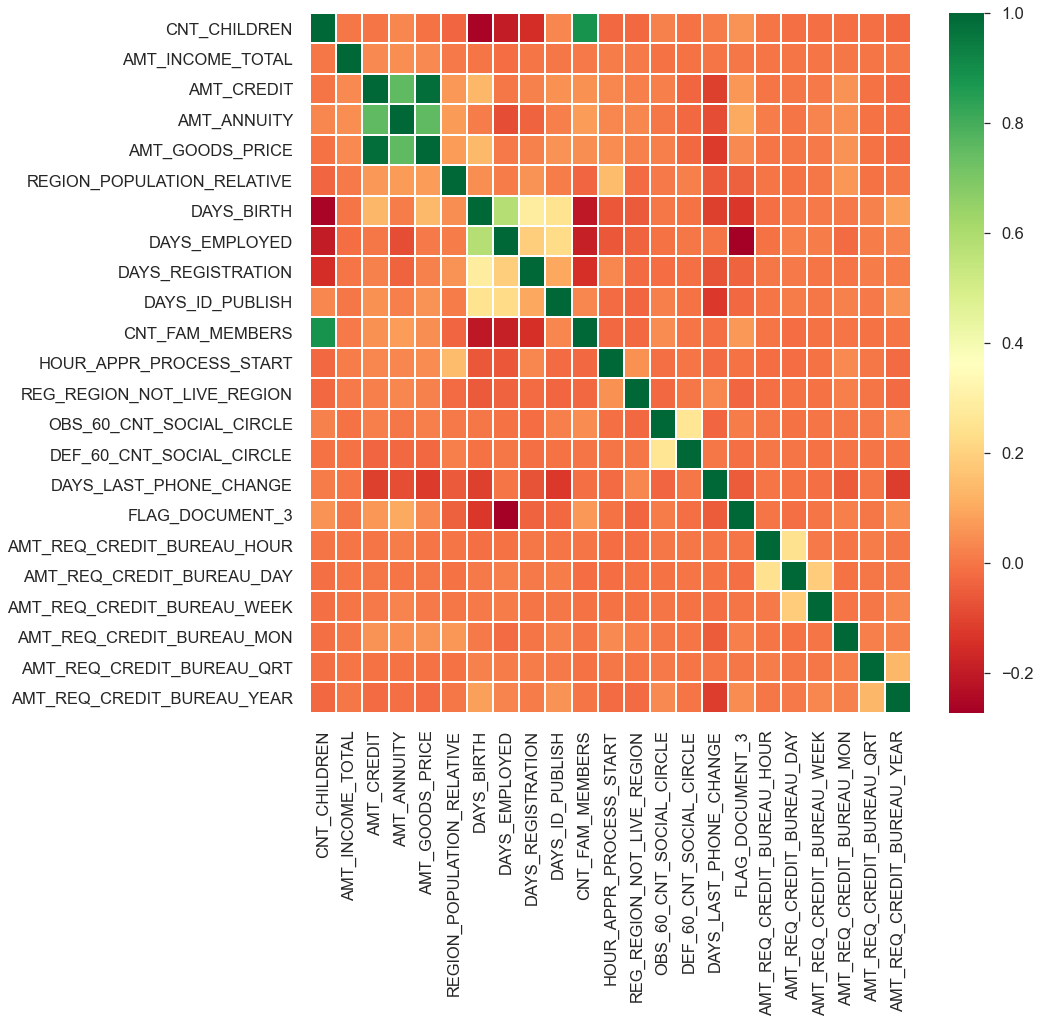

In [108]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(Defaulter_df.corr(), cmap="RdYlGn",annot=False,linewidth =1)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <ul>
            <li> Credit amount is highly correlated with amount of goods price which is same as repayers. </li>
            <li> But the loan annuity correlation with credit amount has slightly reduced in defaulters(0.75) when compared to repayers(0.77)</li>
            <li> We can also see that repayers have high correlation in number of days employed(0.62) when compared to defaulters(0.58).</li>
            <li> There is a severe drop in the correlation between total income of the client and the credit amount(0.038) amongst defaulters whereas it is 0.342 among repayers.</li>
            <li> Days_birth and number of children correlation has reduced to 0.259 in defaulters when compared to 0.337 in repayers.</li>
            <li> There is a slight increase in defaulted to observed count in social circle among defaulters(0.264) when compared to repayers(0.254)</li>
        </ul>
    </span>    
</div>

<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
             5.4.3 Numerical Univariate Analysis
            </span>   
        </font>    
</h4>

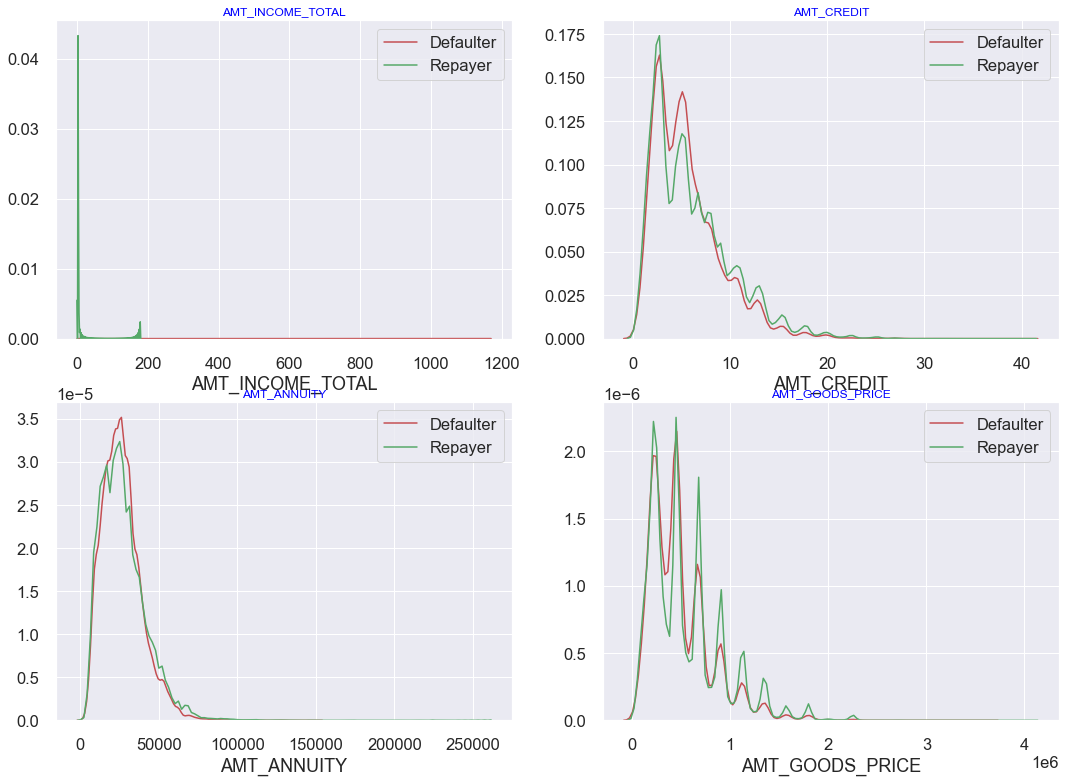

In [109]:
# Plotting the numerical columns related to amount as distribution plot to see density
amount = applicationDF[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(16,12))

for i in enumerate(amount):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(Defaulter_df[i[1]], hist=False, color='r',label ="Defaulter")
    sns.distplot(Repayer_df[i[1]], hist=False, color='g', label ="Repayer")
    plt.title(i[1], fontdict={'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'}) 
    
plt.legend()

plt.show() 

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <ul>
            <li> Most no of loans are given for goods price below 10 lakhs </li>
            <li> Most people pay annuity below 50000 for the credit loan</li>
            <li> Credit amount of the loan is mostly less then 10 lakhs</li>
            <li> The repayers and defaulters distribution overlap in all the plots and hence we cannot use any of these variables in isolation to make a decision</li>
        </ul>
    </span>    
</div>

<h4>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
             5.4.4 Numerical Bivariate Analysis
            </span>   
        </font>    
</h4>

<Figure size 1080x432 with 0 Axes>

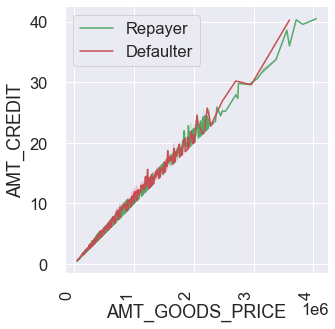

In [110]:
# Checking the relationship between Goods price and credit and comparing with loan repayment status
bivariate_rel('AMT_GOODS_PRICE','AMT_CREDIT',applicationDF,"TARGET", "line", ['g','r'], False,(15,6))

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <br>When the credit amount goes beyond 3M, there is an increase in defaulters.
    </span>    
</div>

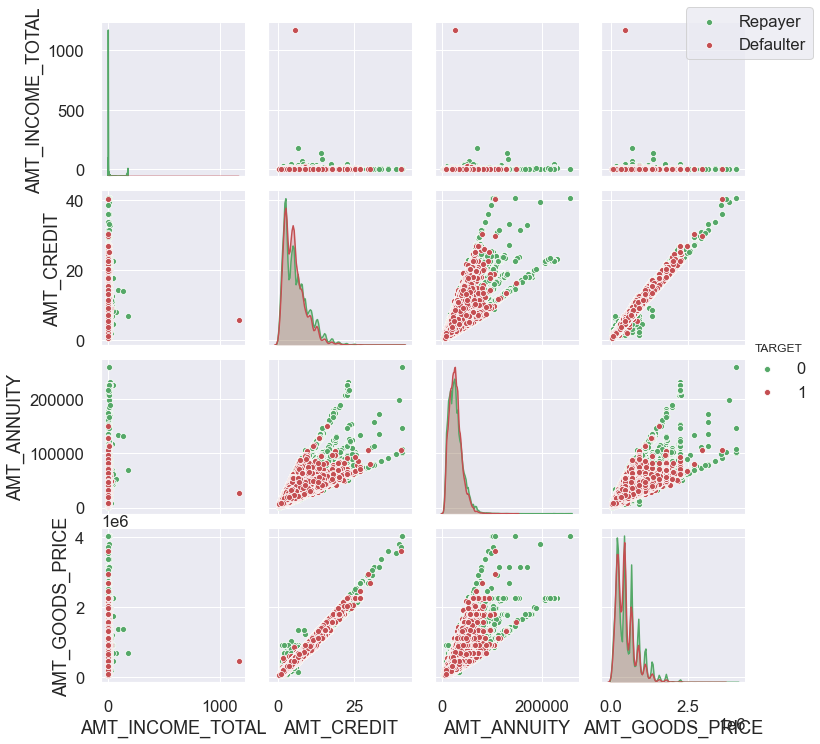

In [111]:
# Plotting pairplot between amount variable to draw reference against loan repayment status
amount = applicationDF[[ 'AMT_INCOME_TOTAL','AMT_CREDIT',
                         'AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]
ax= sns.pairplot(amount,hue="TARGET",palette=["g","r"])
ax.fig.legend(labels=['Repayer','Defaulter'])
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <ul>
            <li> When amt_annuity >15000 amt_goods_price> 3M, there is a lesser chance of defaulters  </li>
            <li> AMT_CREDIT and AMT_GOODS_PRICE are highly correlated as based on the scatterplot where most of the data are consolidated in form of a line</li>
            <li> There are very less defaulters for AMT_CREDIT >3M</li>
            <li> Inferences related to distribution plot has been already mentioned in previous distplot graphs inferences section</li>
        </ul>
    </span>    
</div>

<a id="merge"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            6. Merged Dataframes Analysis
            </span>   
        </font>    
</h2>

In [112]:
#merge both the dataframe on SK_ID_CURR with Inner Joins
loan_process_df = pd.merge(applicationDF, previousDF, how='inner', on='SK_ID_CURR')
loan_process_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AGE,AGE_GROUP,YEARS_EMPLOYED,EMPLOYMENT_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_DECISION_GROUP
0,100002,1,Cash loans,M,N,Y,0,2.025,4.065975,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0,200k-300k,400k-500k,25,20-30,1,0-5,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,400-800
1,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,200k-300k,1M Above,45,40-50,3,0-5,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,400-800
2,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,200k-300k,1M Above,45,40-50,3,0-5,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,800-1200
3,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,200k-300k,1M Above,45,40-50,3,0-5,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,XAP,Approved,2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,2000-2400
4,100004,0,Revolving loans,M,Y,Y,0,0.675,1.350000,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0-100K,100K-200K,52,50 above,0,NaN,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,XAP,Approved,815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,800-1200


In [113]:
#Checking the details of the merged dataframe
loan_process_df.shape

(1413701, 74)

In [114]:
# Checking the element count of the dataframe
loan_process_df.size

104613874

In [115]:
# checking the columns and column types of the dataframe
loan_process_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 74 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  category
 3   CODE_GENDER                  1413701 non-null  category
 4   FLAG_OWN_CAR                 1413701 non-null  category
 5   FLAG_OWN_REALTY              1413701 non-null  category
 6   CNT_CHILDREN                 1413701 non-null  int64   
 7   AMT_INCOME_TOTAL             1413701 non-null  float64 
 8   AMT_CREDIT_x                 1413701 non-null  float64 
 9   AMT_ANNUITY_x                1413608 non-null  float64 
 10  AMT_GOODS_PRICE_x            1412493 non-null  float64 
 11  NAME_TYPE_SUITE              1413701 non-null  category
 12  NAME_INCOME_TYPE            

In [116]:
# Checking merged dataframe numerical columns statistics
loan_process_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413608e+06,1.412493e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.410555e+06,1.410555e+06,1.410555e+06,1.410555e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413700e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06
mean,2.784813e+05,8.655296e-02,4.048933e-01,1.733160e+00,5.875537e+00,2.701702e+04,5.277186e+05,2.074985e-02,1.632105e+04,7.266347e+04,5.003233e+03,3.034563e+03,2.150501e+00,1.198433e+01,1.207327e-02,1.544176e+00,1.540436e-01,1.526303e+00,1.080426e-01,-1.084701e+03,7.385600e-01,5.484894e-03,6.028149e-03,3.410198e-02,2.664913e-01,3.196935e-01,2.691239e+00,4.421384e+01,1.985500e+02,1.922744e+06,1.484032e+04,1.752436e+05,1.963541e+05,1.854396e+05,8.803670e+02,3.149878e+02,1.256367e+01
std,1.028118e+05,2.811789e-01,7.173454e-01,1.985734e+00,3.849173e+00,1.395116e+04,3.532465e+05,1.334702e-02,4.344557e+03,1.433374e+05,3.551051e+03,1.507376e+03,9.006787e-01,3.232181e+00,1.092132e-01,2.530715e+00,4.658973e-01,2.508953e+00,3.790588e-01,7.999369e+02,4.394192e-01,7.702591e-02,1.001966e-01,2.012902e-01,9.268428e-01,8.781444e-01,2.157176e+00,1.190217e+01,3.926378e+02,5.327153e+05,1.316370e+04,2.936222e+05,3.194813e+05,2.881244e+05,7.835402e+02,7.695082e+03,1.448807e+01
min,1.000020e+05,0.000000e+00,0.000000e+00,2.565000e-01,4.500000e-01,1.615500e+03,4.050000e+04,2.900000e-04,7.489000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.292000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00
25%,1.893640e+05,0.000000e+00,0.000000e+00,1.125000e+00,2.700000e+00,1.682100e+04,2.385000e+05,1.003200e-02,1.273900e+04,1.042000e+03,2.001000e+03,1.783000e+03,2.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.683000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.400000e+01,2.000000e+00,1.461346e+06,7.406055e+03,1.975050e+04,2.488050e+04,4.500000e+04,2.710000e+02,-1.000000e+00,0.000000e+00
50%,2.789920e+05,0.000000e+00,0.000000e+00,1.575000e+00,5.084955e+00,2.492550e+04,4.500000e+05,1.885000e-02,1.604400e+04,2.401000e+03,4.508000e+03,3.330000e+03,2.000000e+00,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.011000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,4.300000e+01,6.000000e+00,1.922698e+06,1.125000e+04,7.087050e+04,8.059500e+04,7.087500e+04,5.820000e+02,4.000000e+00,1.000000e+01
75%,3.675560e+05,0.000000e+00,1.000000e+00,2.070000e+00,8.079840e+00,3.454200e+04,6.795000e+05,2.866300e-02,1.998000e+04,6.313000e+03,7.510000e+03,4.319000e+03,3.000000e+00,1.400000e+01,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,-3.960000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,5.400000e+01,1.700000e+01,2.384012e+06,1.67479

In [117]:
# Bifurcating the applicationDF dataframe based on Target value 0 and 1 for correlation and other analysis

L0 = loan_process_df[loan_process_df['TARGET']==0] # Repayers
L1 = loan_process_df[loan_process_df['TARGET']==1] # Defaulters

<p>
    <span style='font-family:Georgia'>
        <b> Plotting Contract Status vs purpose of the loan: </b>
    </span>
</p>

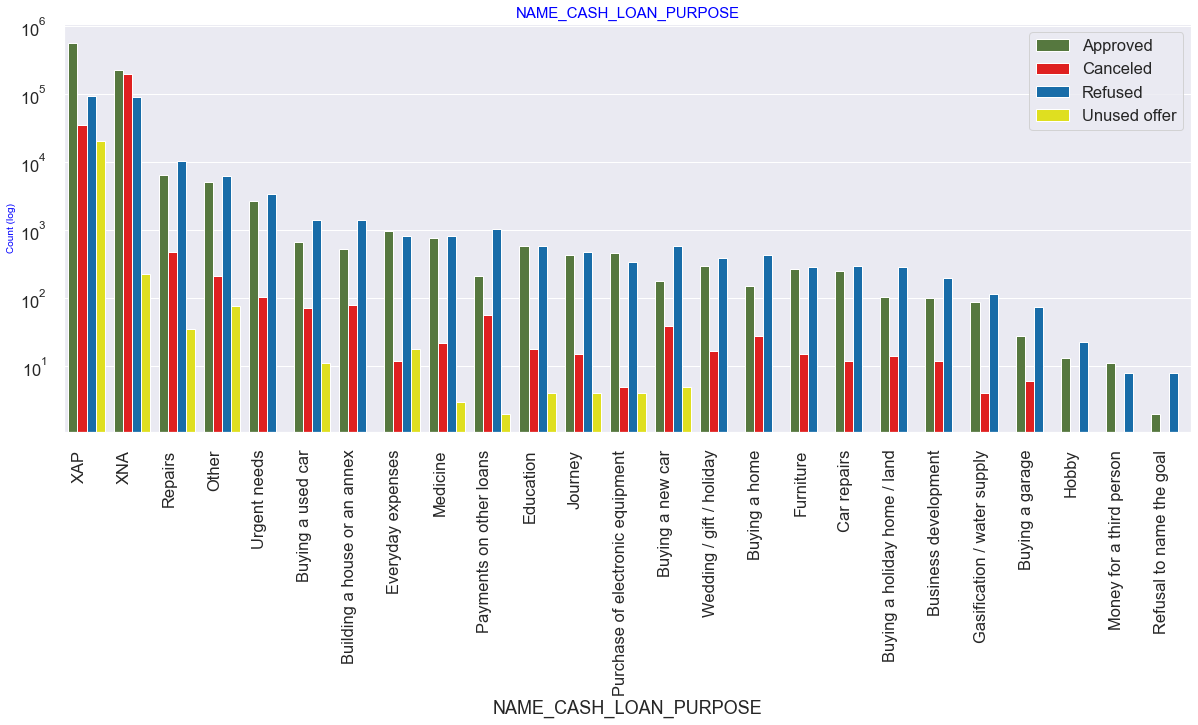

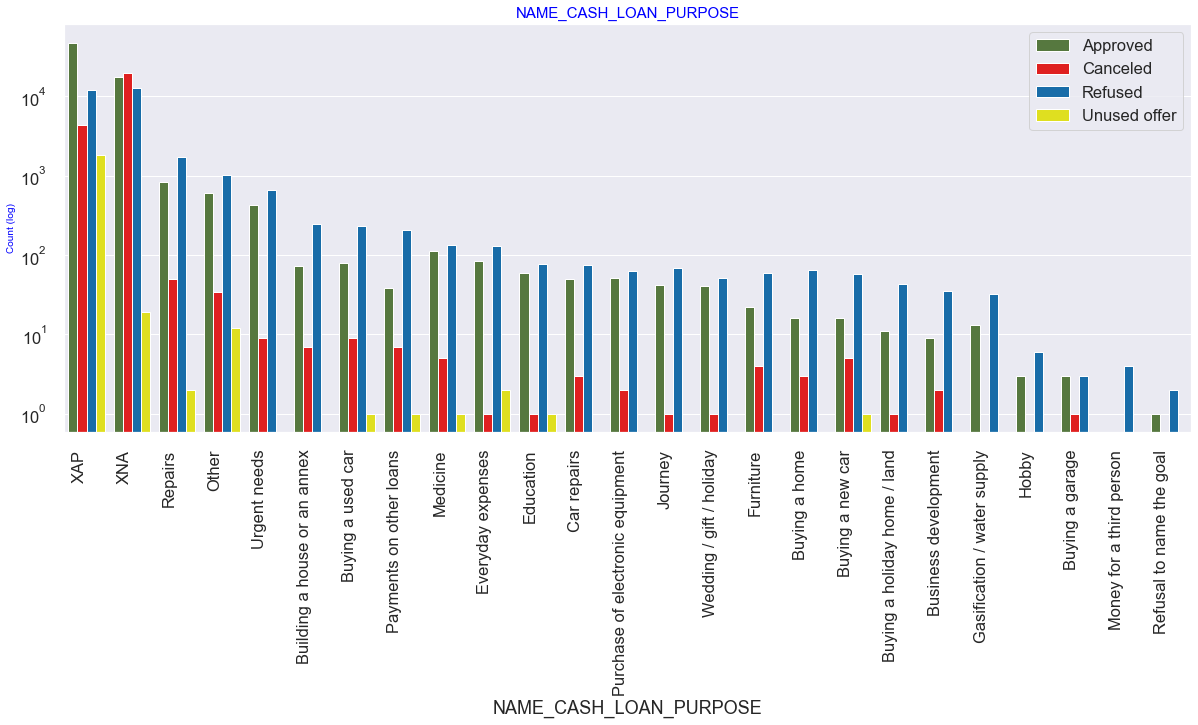

In [118]:
univariate_merged("NAME_CASH_LOAN_PURPOSE",L0,"NAME_CONTRACT_STATUS",["#548235","#FF0000","#0070C0","#FFFF00"],True,(18,7))

univariate_merged("NAME_CASH_LOAN_PURPOSE",L1,"NAME_CONTRACT_STATUS",["#548235","#FF0000","#0070C0","#FFFF00"],True,(18,7))

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <ul>
            <li> Loan purpose has high number of unknown values (XAP, XNA)</li>
            <li> Loan taken for the purpose of Repairs seems to have highest default rate</li>
            <li> A very high number application have been rejected by bank or refused by client which has purpose as repair or other. This shows that purpose repair is taken as high risk by bank and either they are rejected or bank offers very high loan interest rate which is not feasible by the clients, thus they refuse the loan.</li>
        </ul>
    </span>    
</div>

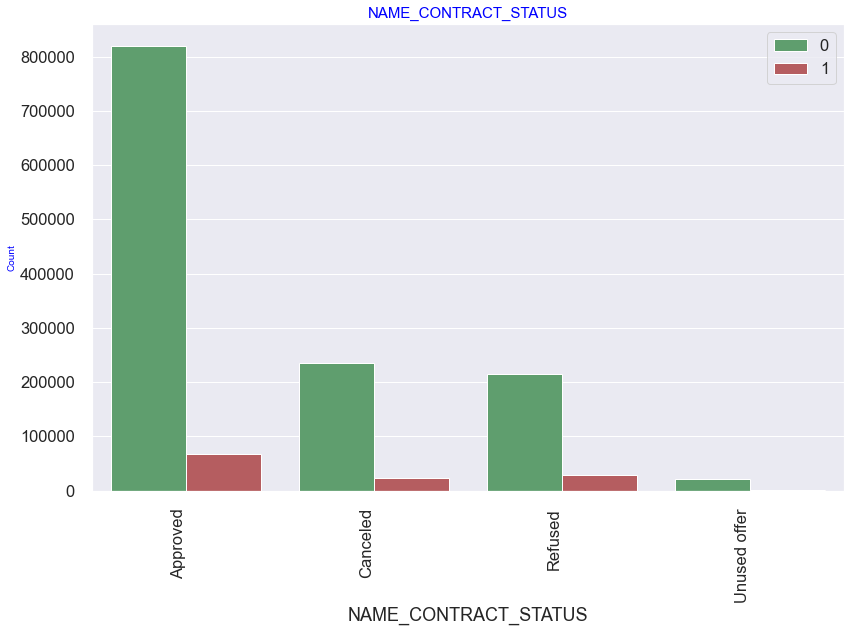

                             Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0       818856     92.41%
                     1        67243      7.59%
Canceled             0       235641     90.83%
                     1        23800      9.17%
Refused              0       215952      88.0%
                     1        29438      12.0%
Unused offer         0        20892     91.75%
                     1         1879      8.25%


In [119]:
# Checking the Contract Status based on loan repayment status and whether there is any business loss or financial loss
univariate_merged("NAME_CONTRACT_STATUS",loan_process_df,"TARGET",['g','r'],False,(12,8))
g = loan_process_df.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([g.value_counts(),round(g.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1['Percentage'] = df1['Percentage'].astype(str) +"%" # adding percentage symbol in the results for understanding
print (df1)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <ul>
            <li> 90% of the previously cancelled client have actually repayed the loan. Revisiting the interest rates would increase business opoortunity for these clients</li>
            <li> 88% of the clients who have been previously refused a loan has payed back the loan in current case.</li>
            <li> Refusal reason should be recorded for further analysis as these clients would turn into potential repaying customer. </li>
        </ul>
    </span>    
</div>

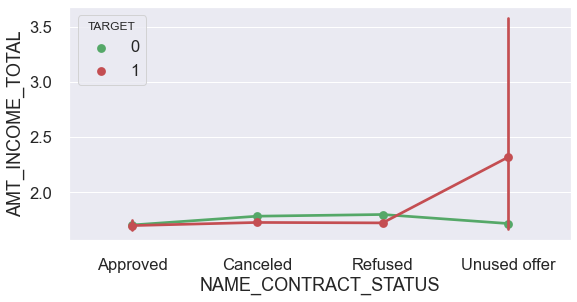

In [120]:
# plotting the relationship between income total and contact status
merged_pointplot("NAME_CONTRACT_STATUS",'AMT_INCOME_TOTAL')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b><br>
        The point plot show that the people who have not used offer earlier have defaulted even when there average income is higher than others
    </span>    
</div>

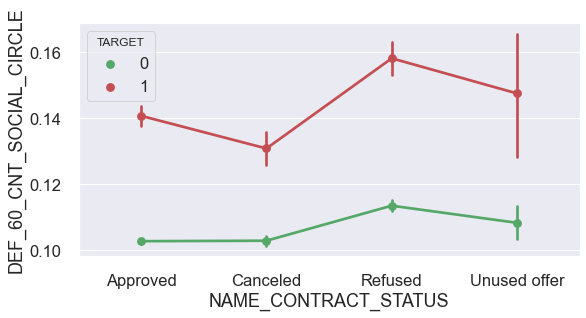

In [121]:
# plotting the relationship between people who defaulted in last 60 days being in client's social circle and contact status
merged_pointplot("NAME_CONTRACT_STATUS",'DEF_60_CNT_SOCIAL_CIRCLE')

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Inferences: </b><br> 
        Clients who have average of 0.13 or higher DEF_60_CNT_SOCIAL_CIRCLE score tend to default more and hence client's social circle has to be analysed before providing the loan.
    </span>    
</div>

<a id="conclusion"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            7. Conclusions
            </span>   
        </font>    
</h2>

<p>
    <span style='font-family:Georgia'>
        After analysing the datasets, there are few attributes of a client with which the bank would be able to identify if they will repay the loan or not. The analysis is concised as below with the contributing factors and categorization:
    </span>
</p>

<div class="alert alert-block alert-success">
    <span style='font-family:Georgia'>
        <b>Decisive Factor whether an applicant will be Repayer: </b> 
        <ol>
            <li>NAME_EDUCATION_TYPE: Academic degree has less defaults. </li>
            <li>NAME_INCOME_TYPE: Student and Businessmen have no defaults.</li>
            <li>REGION_RATING_CLIENT: RATING 1 is safer.</li>
            <li>ORGANIZATION_TYPE: Clients with Trade Type 4 and 5 and Industry type 8 have defaulted less than 3%</li>
            <li>DAYS_BIRTH: People above age of 50 have low probability of defaulting</li>
            <li>DAYS_EMPLOYED: Clients with 40+ year experience having less than 1% default rate</li>
            <li>AMT_INCOME_TOTAL:Applicant with Income more than 700,000 are less likely to default</li>
            <li>NAME_CASH_LOAN_PURPOSE: Loans bought for Hobby, Buying garage are being repayed mostly.</li>
            <li>CNT_CHILDREN: People with zero to two children tend to repay the loans.</li>
        </ol>
    </span>    
</div>

<div class="alert alert-block alert-danger">
    <span style='font-family:Georgia'>
        <b>Decisive Factor whether an applicant will be Defaulter: </b> 
        <ol>
            <li>CODE_GENDER: Men are at relatively higher default rate</li>
            <li>NAME_FAMILY_STATUS : People who have civil marriage or who are single default a lot. </li>
            <li>NAME_EDUCATION_TYPE: People with Lower Secondary & Secondary education</li>
            <li>NAME_INCOME_TYPE: Clients who are either at Maternity leave OR Unemployed default a lot.</li>
            <li>REGION_RATING_CLIENT: People who live in Rating 3 has highest defaults.</li>
            <li>OCCUPATION_TYPE: Avoid Low-skill Laborers, Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff as the default rate is huge.</li>
            <li>ORGANIZATION_TYPE: Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). Self-employed people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.</li>
            <li>DAYS_BIRTH: Avoid young people who are in age group of 20-40 as they have higher probability of defaulting</li>
            <li>DAYS_EMPLOYED: People who have less than 5 years of employment have high default rate.</li>
            <li>CNT_CHILDREN & CNT_FAM_MEMBERS: Client who have children equal to or more than 9 default 100% and hence their applications are to be rejected.</li>
            <li>AMT_GOODS_PRICE: When the credit amount goes beyond 3M, there is an increase in defaulters.</li>
        </ol>
    </span>    
</div>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <p>The following attributes indicate that people from these category tend to default but then due to the number of people and the amount of loan, the bank could provide loan with higher interest to mitigate any default risk thus preventing business loss:  </p> 
        <ol>
            <li>NAME_HOUSING_TYPE: High number of loan applications are from the category of people who live in Rented apartments & living with parents and hence offering the loan would mitigate the loss if any of those default.</li>
            <li>AMT_CREDIT: People who get loan for 300-600k tend to default more than others and hence having higher interest specifically for this credit range would be ideal.</li>
            <li>AMT_INCOME: Since 90% of the applications have Income total less than 300,000 and they have high probability of defaulting, they could be offered loan with higher interest compared to other income category.</li>
            <li>CNT_CHILDREN & CNT_FAM_MEMBERS: Clients who have 4 to 8 children has a very high default rate and hence higher interest should be imposed on their loans.</li>
            <li>NAME_CASH_LOAN_PURPOSE: Loan taken for the purpose of Repairs seems to have highest default rate. A very high number applications have been rejected by bank or refused by client in previous applications as well which has purpose as repair or other. This shows that purpose repair is taken as high risk by bank and either they are rejected, or bank offers very high loan interest rate which is not feasible by the clients, thus they refuse the loan. The same approach could be followed in future as well.</li>
        </ol>
    </span>    
</div>

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Other suggestions: </b>
        <ul>
            <li>90% of the previously cancelled client have actually repayed the loan. Record the reason for cancellation which might help the bank to determine and negotiate terms with these repaying customers in future for increase business opportunity. </li>
            <li>88% of the clients who were refused by bank for loan earlier have now turned into a repaying client. Hence documenting the reason for rejection could mitigate the business loss and these clients could be contacted for further loans.</li>
        </ul>
    </span>    
</div>